# Julia Juypter notebook for Developmental hematopoietic stem cell fate decisions explain clonal dynamics over lifetime

In [1]:
#packages
using Statistics
using LinearAlgebra
using DataStructures
using StatsBase
using StatsPlots
using Distributions
using LsqFit
using Random
using ColorSchemes
using Plots; pyplot()
using DelimitedFiles

#random number generator
rng = MersenneTwister()

#color definitions
logocolors = Colors.JULIA_LOGO_COLORS
color1 = RGBA(113/255,46/255,103/255,1)
color2 = RGBA(38/255,117/255,146/255,1)
color3 = RGBA(95/255,177/255,42/255,1)
color4 = RGBA(199/255,200/255,0/255,1)
color5 = RGBA(255/255,121/255,23/255,1)
color6 = RGBA(226/255,58/255,52/255,1)

## Data

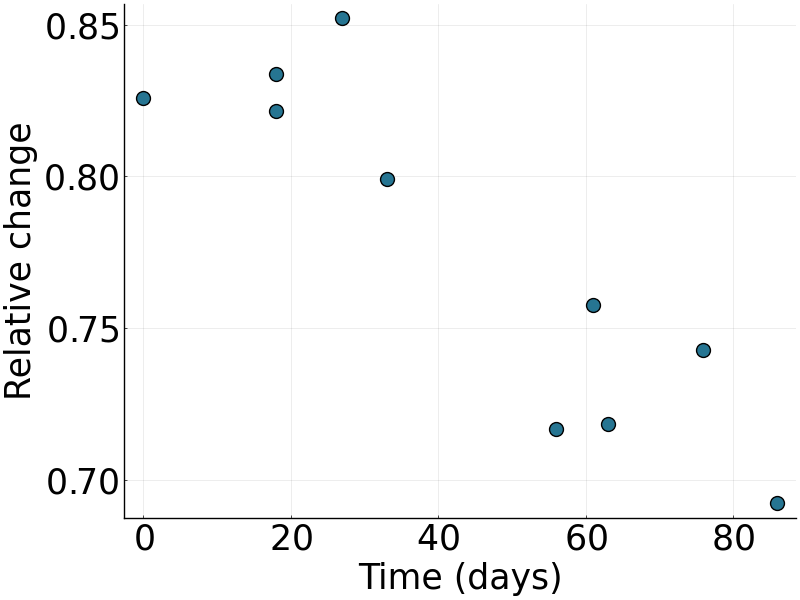

In [2]:
#data (monozygotic twins)
time_estimated_mt = [0,18,18,27,33,56,61,63,76,86]
data_estimated_mt = [0.825891396,0.821590948,0.833671828,0.85202121,0.799015952,0.716730547,0.757637738,0.718466077,0.742999273,0.692435016]
scatter()
scatter!(time_estimated_mt, data_estimated_mt, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color2, color2],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

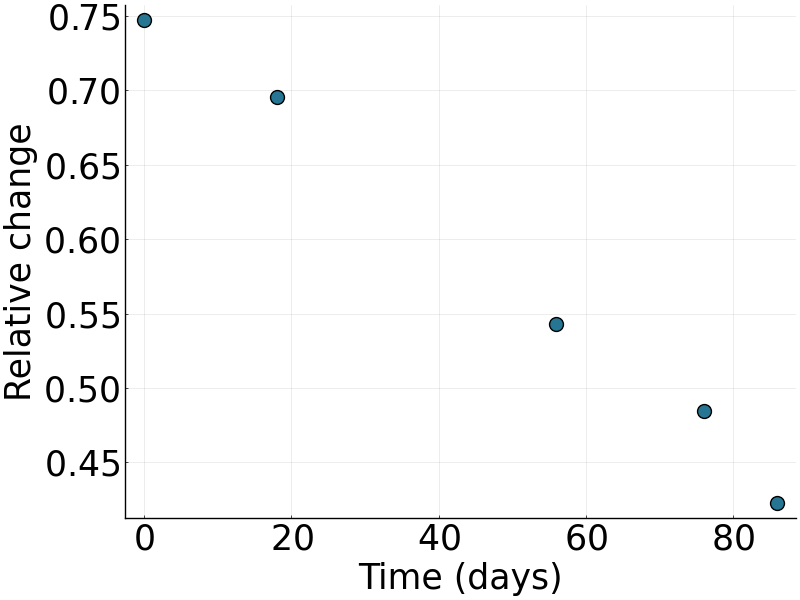

In [3]:
#data (dizygotic twins)
time_estimated_dt = [0,18,56,76,86]
data_estimated_dt = [0.747124291,0.695449824,0.543082825,0.484395713,0.422693383]
scatter()
scatter!(time_estimated_dt, data_estimated_dt, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color2, color2],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

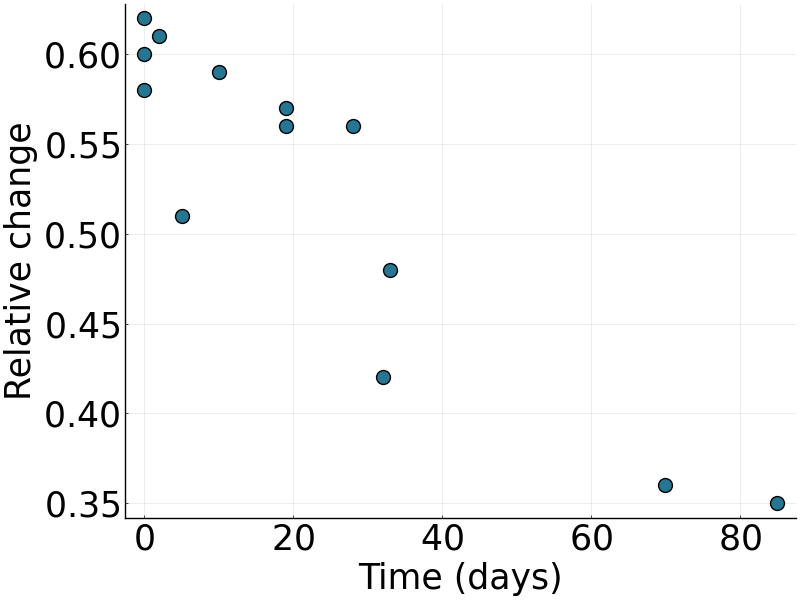

In [4]:
#data (unrelated individuals)
time_estimated_ur = [0,0,0,2,5,10,19,19,28,32,33,70,85]
data_estimated_ur = [0.62,0.60,0.58,0.61,0.51,0.59,0.56,0.57,0.56,0.42,0.48,0.36,0.35]
scatter()
scatter!(time_estimated_ur, data_estimated_ur, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color2, color2],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

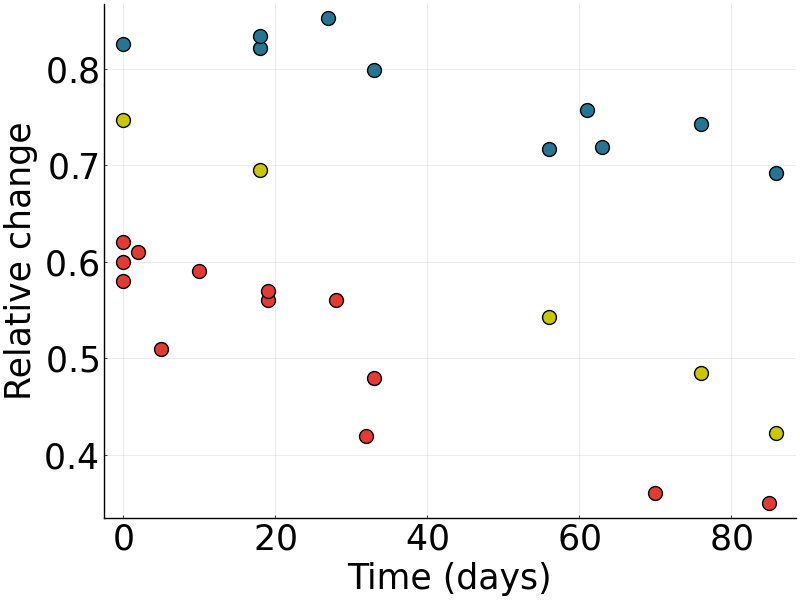

In [5]:
#plot all data together
scatter()
scatter!(time_estimated_mt, data_estimated_mt, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color2, color2],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_estimated_dt, data_estimated_dt, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color4, color4],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_estimated_ur, data_estimated_ur, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color6, color6],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

In [6]:
#line of best fit and confidence interval (monozygotic twins) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_mt = curve_fit(model, time_estimated_mt, data_estimated_mt, p0)
sigma_mt = stderror(fit_mt)
margin_of_error_mt = margin_error(fit_mt, 0.05)
confidence_inter_mt = confidence_interval(fit_mt, 0.05)
bf_parms_mt = coef(fit_mt)

2-element Vector{Float64}:
 -0.0018006190812681865
  0.8549131142595467

In [7]:
interval_p1_mt = confidence_inter_mt[1]

(-0.00253041736920075, -0.0010708207933356228)

In [8]:
interval_p2_mt = confidence_inter_mt[2]

(0.8173699750211845, 0.892456253497909)

In [9]:
#line of best fit and confidence interval (dizygotic twins) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_dt = curve_fit(model, time_estimated_dt, data_estimated_dt, p0)
sigma_dt = stderror(fit_dt)
margin_of_error_dt = margin_error(fit_dt, 0.05)
confidence_inter_dt = confidence_interval(fit_dt, 0.05)
bf_parms_dt = coef(fit_dt)

2-element Vector{Float64}:
 -0.0037214485778149496
  0.7542015800862559

In [10]:
interval_p1_dt = confidence_inter_dt[1]

(-0.0042333339530427035, -0.003209563202587195)

In [11]:
interval_p2_dt = confidence_inter_dt[2]

(0.7246786160320609, 0.783724544140451)

In [12]:
#line of best fit and confidence interval (unrelated individuals) 
@. model(x, p) = p[1]*x + p[2]
p0 = [-1.0, 1.0]
fit_ur = curve_fit(model, time_estimated_ur, data_estimated_ur, p0)
sigma_ur = stderror(fit_ur)
margin_of_error_ur = margin_error(fit_ur, 0.05)
confidence_inter_ur = confidence_interval(fit_ur, 0.05)
bf_parms_ur = coef(fit_ur)

2-element Vector{Float64}:
 -0.003141086083464255
  0.597057621791513

In [13]:
interval_p1_ur = confidence_inter_ur[1]

(-0.004083718131658187, -0.002198454035270323)

In [14]:
interval_p2_ur = confidence_inter_ur[2]

(0.5641194088364767, 0.6299958347465493)

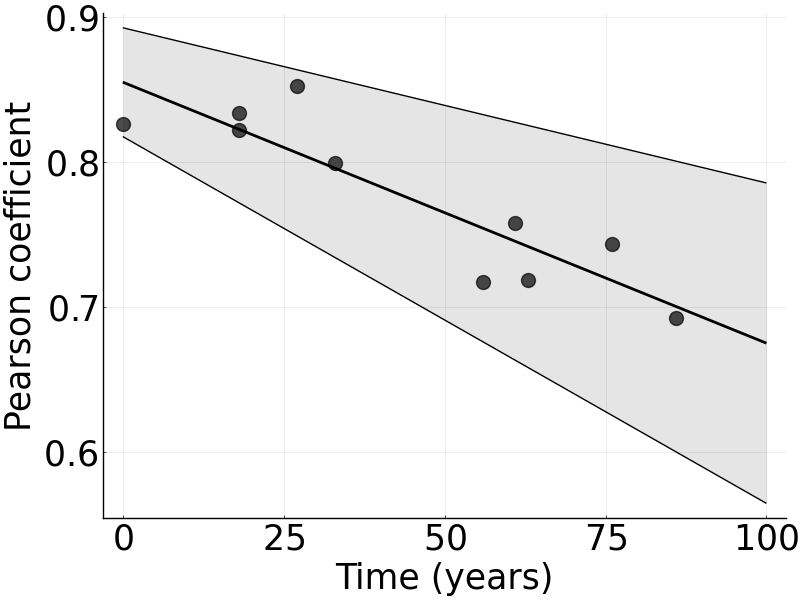

In [15]:
#plot with line of best fit (monozygotic twins) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mt[2], interval_p2_mt[2]]), linewidth = 1, color = "Black", alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mt[1], interval_p2_mt[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mt[2], interval_p2_mt[2]]), fillalpha = 0.1, color = "Black", label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mt[1], bf_parms_mt[2]]), linewidth = 2, color = "Black", alpha = 1)
scatter!(time_estimated_mt, data_estimated_mt, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

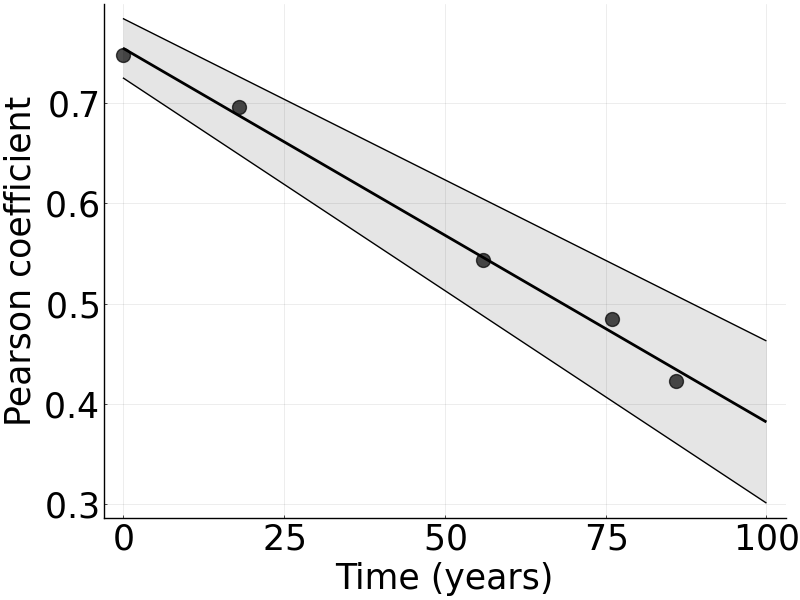

In [16]:
#plot with line of best fit (dizygotic twins) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_dt[2], interval_p2_dt[2]]), linewidth = 1, color = "Black", alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_dt[1], interval_p2_dt[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_dt[2], interval_p2_dt[2]]), fillalpha = 0.1, color = "Black", label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_dt[1], bf_parms_dt[2]]), linewidth = 2, color = "Black", alpha = 1)
scatter!(time_estimated_dt, data_estimated_dt, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

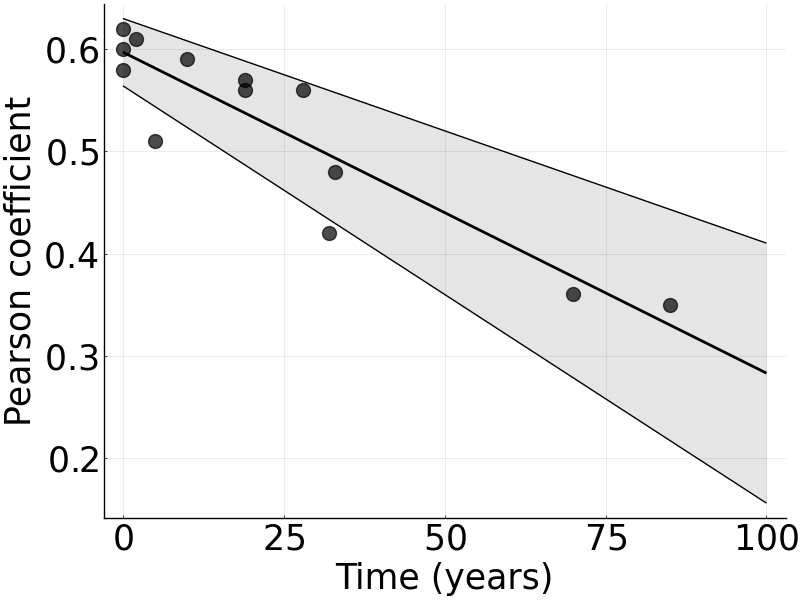

In [17]:
#plot with line of best fit (unrelated individuals) 
scatter()
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_ur[2], interval_p2_ur[2]]), linewidth = 1, color = "Black", alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_ur[1], interval_p2_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_ur[2], interval_p2_ur[2]]), fillalpha = 0.1, color = "Black", label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_ur[1], bf_parms_ur[2]]), linewidth = 2, color = "Black", alpha = 1)
scatter!(time_estimated_ur, data_estimated_ur, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

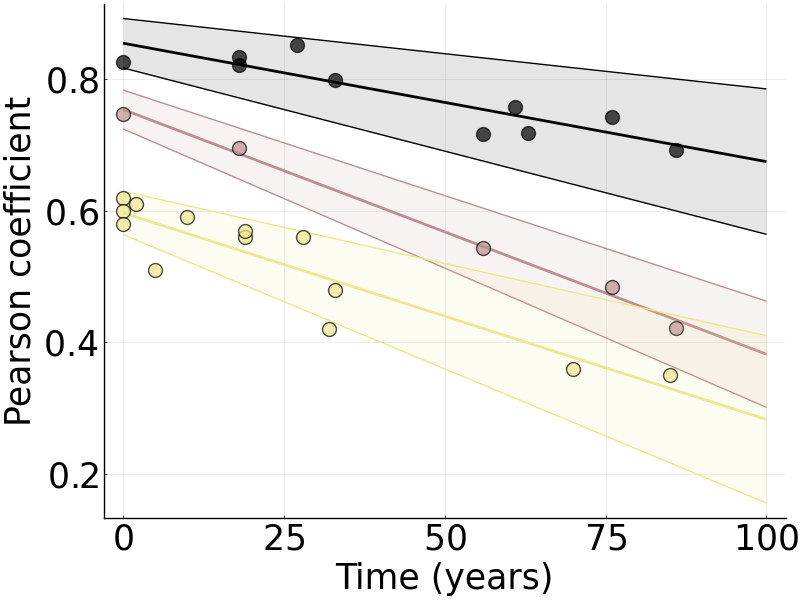

In [18]:
#plot all data together
scatter()

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mt[2], interval_p2_mt[2]]), linewidth = 1, color = "black", alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mt[1], interval_p2_mt[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mt[2], interval_p2_mt[2]]), fillalpha = 0.1, color = "black", label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mt[1], bf_parms_mt[2]]), linewidth = 2, color = "black", alpha = 1)
scatter!(time_estimated_mt, data_estimated_mt, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["black", "black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_dt[2], interval_p2_dt[2]]), linewidth = 1, color = "rosybrown", alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_dt[1], interval_p2_dt[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_dt[2], interval_p2_dt[2]]), fillalpha = 0.1, color = "rosybrown", label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_dt[1], bf_parms_dt[2]]), linewidth = 2, color = "rosybrown", alpha = 1)
scatter!(time_estimated_dt, data_estimated_dt, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["rosybrown", "rosybrown"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_ur[2], interval_p2_ur[2]]), linewidth = 1, color = "khaki", alpha = 1)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_ur[1], interval_p2_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_ur[2], interval_p2_ur[2]]), fillalpha = 0.1, color = "khaki", label = "Confidence band", legend = :topleft)
plot!(LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_ur[1], bf_parms_ur[2]]), linewidth = 2, color = "khaki", alpha = 1)
scatter!(time_estimated_ur, data_estimated_ur, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["khaki", "khaki"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)

## Initial Pearson value simulations

In [36]:
#define parameters
number_of_cells = 1000 #number of cells
number_of_locations = 100 #number of fCpG sites
number_of_shared_cells = 36 #number of shared cells
number_of_clones = 10 #number of clones
number_of_twins = 2 #number of twins
number_of_simulations = 10 #number of simulations
a_shape = 0.2 #gamma distribution shape parameter
theta_scale = 0.05 #gamam distribution scale parameter

0.05

In [23]:
#define initial clones
initial_clones = zeros(number_of_clones,number_of_locations)

for i = 1:number_of_clones
    for j = 1:number_of_locations
        initial_clones[i,j] = 2*rand(rng, 0:1)
    end
end

In [24]:
initial_clones

10×100 Matrix{Float64}:
 0.0  2.0  0.0  2.0  2.0  2.0  2.0  0.0  …  0.0  2.0  2.0  0.0  0.0  2.0  2.0
 2.0  2.0  0.0  0.0  0.0  2.0  0.0  2.0     0.0  0.0  2.0  0.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  0.0  0.0  2.0  0.0     0.0  2.0  0.0  0.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  2.0  0.0  2.0     0.0  2.0  0.0  0.0  2.0  0.0  2.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  2.0     2.0  2.0  0.0  0.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  0.0  …  2.0  0.0  0.0  0.0  2.0  0.0  2.0
 2.0  2.0  0.0  2.0  2.0  0.0  2.0  0.0     0.0  2.0  2.0  2.0  0.0  0.0  0.0
 2.0  2.0  2.0  0.0  0.0  0.0  2.0  2.0     0.0  0.0  0.0  0.0  2.0  0.0  2.0
 0.0  2.0  2.0  0.0  2.0  0.0  0.0  0.0     0.0  2.0  0.0  0.0  2.0  0.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  0.0     0.0  2.0  0.0  0.0  2.0  2.0  2.0

In [31]:
#clone fitness coefficients
dist = Gamma(a_shape,theta_scale)
fitness_clones = AnalyticWeights(rand(dist,number_of_clones))

10-element AnalyticWeights{Float64, Float64, Vector{Float64}}:
 3.996670484269606e-7
 0.002999478988067434
 0.0021761199102480998
 0.07113248985177101
 0.00024248484164026261
 0.00012552466627096596
 0.02540302635221941
 7.831786210254491e-6
 4.257454950718525e-5
 0.0016954924177513973

In [32]:
mean_gamma = a_shape*theta_scale
standard_deviation = sqrt(a_shape*(theta_scale^2))
print(mean_gamma, "\n")
print(standard_deviation, "\n")
print(mean(fitness_clones), "\n")
print(sqrt(var(fitness_clones)), "\n")

0.010000000000000002
0.0223606797749979
0.010382542303073443
0.02271528244656299


In [33]:
fitness_clones = fitness_clones .+ 1

10-element Vector{Float64}:
 1.0000003996670483
 1.0029994789880674
 1.0021761199102481
 1.0711324898517711
 1.0002424848416402
 1.000125524666271
 1.0254030263522194
 1.0000078317862102
 1.0000425745495072
 1.0016954924177515

In [35]:
#clone with highest fitness
print(findmax(fitness_clones), "\n")

(1.0711324898517711, 4)


In [57]:
sort(fitness_clones, rev=true)

10-element Vector{Float64}:
 1.0711324898517711
 1.0254030263522194
 1.0029994789880674
 1.0021761199102481
 1.0016954924177515
 1.0002424848416402
 1.000125524666271
 1.0000425745495072
 1.0000078317862102
 1.0000003996670483

In [55]:
sortperm(fitness_clones, rev=true)

10-element Vector{Int64}:
  4
  7
  2
  3
 10
  5
  6
  9
  8
  1

In [37]:
#perform number_of_simulations simulations calculating the initial Pearson coefficient at birth
pearson_cells = zeros(number_of_simulations)

clone_count_shared = zeros(number_of_clones)
clone_count_unshared = zeros(number_of_clones,number_of_twins)

for simmys = 1:number_of_simulations
    print(simmys, "  ")

    ave_cells = zeros(number_of_locations, 101, number_of_twins)

    #define initial conditions
    shared_cells = zeros(number_of_cells,number_of_locations)
    frequencies = zeros(number_of_clones)

    #define initial number_of_clones cells
    for i = 1:number_of_clones
        shared_cells[i,:] = initial_clones[i,:]
    end

    #select rest of cells
    for i = number_of_clones+1:number_of_shared_cells

        frequencies = zeros(number_of_clones)
        for k = 1:number_of_clones
            for j = 1:i-1 
                if shared_cells[j,:] == initial_clones[k,:]
                    frequencies[k] = frequencies[k] + 1
                end
            end
        end
        frequencies = frequencies/(i-1)

        #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent growth
        l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent growth weighted by fitness
        #l = rand(rng, 1:number_of_clones) #uniform growth
        #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform growth weighted by fitness
        shared_cells[i,:] = initial_clones[l,:]
    end

    clone_count_shared = zeros(number_of_clones)
    clone_count_unshared = zeros(number_of_clones,number_of_twins)
    for k = 1:number_of_clones
        for j = 1:number_of_shared_cells
            if shared_cells[j,:] == initial_clones[k,:]
                clone_count_shared[k] = clone_count_shared[k] + 1
            end
        end
    end

    #simulate number_of_twins individuals
    for sim_number = 1:number_of_twins

        #define initial conditions
        cells = zeros(number_of_cells,number_of_locations)
        cells[1:number_of_shared_cells,:] = copy(shared_cells[1:number_of_shared_cells,:])
        frequencies = zeros(number_of_clones)


        #select rest of cells
        for i = number_of_shared_cells+1:number_of_cells

            frequencies = zeros(number_of_clones)
            for k = 1:number_of_clones
                for j = 1:i-1 
                    if cells[j,:] == initial_clones[k,:]
                        frequencies[k] = frequencies[k] + 1
                    end
                end
            end
            frequencies = frequencies/(i-1)

            #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent growth
            l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent growth weighted by fitness
            #l = rand(rng, 1:number_of_clones) #uniform growth
            #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform growth weighted by fitness    
            cells[i,:] = initial_clones[l,:]
        end

        for k = 1:number_of_clones
            for j = 1:number_of_cells
                if cells[j,:] == initial_clones[k,:]
                    clone_count_unshared[k,sim_number] = clone_count_unshared[k,sim_number] + 1
                end
            end
        end

        time_years = 1
        t = 0
        ave_cells[:,1,sim_number] = mean(cells,dims=1)

    end

#calculate the Pearson coefficient
cor_cells = cor(ave_cells[:,1,:])
vec_cells = cor_cells[tril!(trues(size(cor_cells)), -1)]
pearson_cells[simmys] = vec_cells[1]

end

1  2  3  4  5  6  7  8  9  10  

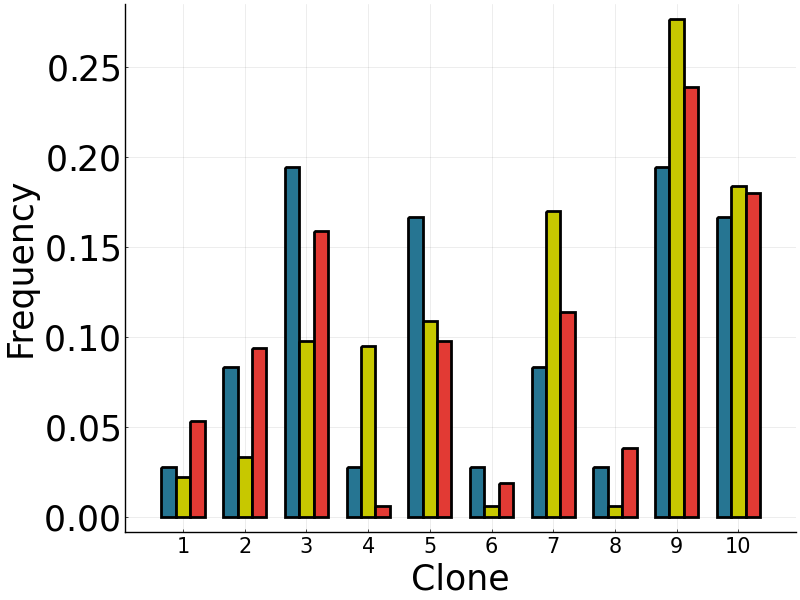

In [38]:
#plot frequencies of final simulation
groupedbar([clone_count_shared./number_of_shared_cells clone_count_unshared[:,1]./number_of_cells clone_count_unshared[:,2]./number_of_cells], bar_position = :dodge, bar_width=0.7, xticks = ([1:1:number_of_clones;], [1:1:number_of_clones;]), color = [color2 color4 color6], lw = 2, size =(1600/2,600), font = "Ariel", alpha = [1 1 1], legend = false, xtickfontsize=15, ytickfontsize=25, xlabel="Clone", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "", titlefontsize=25)

In [39]:
print(pearson_cells, "\n")
print(mean(pearson_cells), "\n")
print(std(pearson_cells), "\n")

[0.9330837499340321, 0.8998987471591429, 0.9297654666260444, 0.9371039315977453, 0.7362910823835507, 0.9602855125074871, 0.8192520540449488, 0.8313793596605897, 0.9494928997765479, 0.9469555949630909]
0.8943508398653177
0.07405437207564187


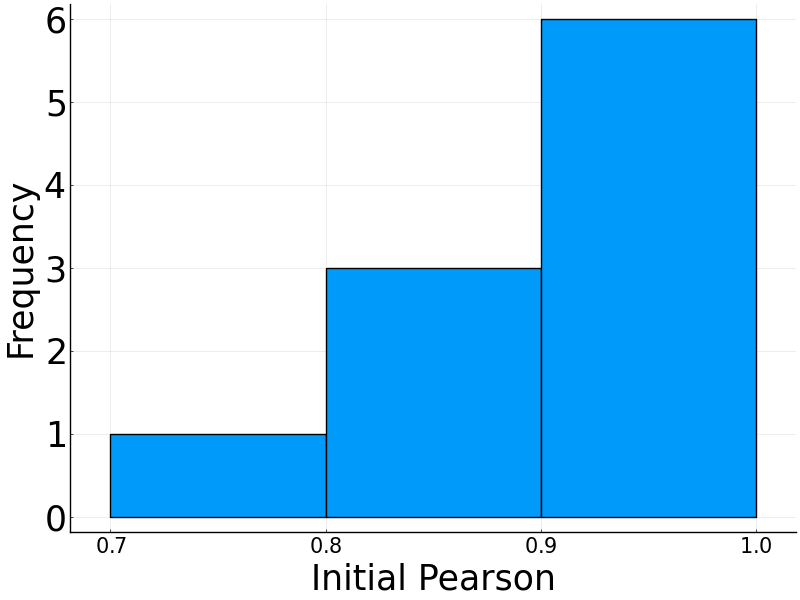

In [40]:
#histogram of initial Pearson coefficients at birth
histogram(pearson_cells, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=15, ytickfontsize=25, xlabel="Initial Pearson", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "", titlefontsize=25)

## Initial Pearson value plots

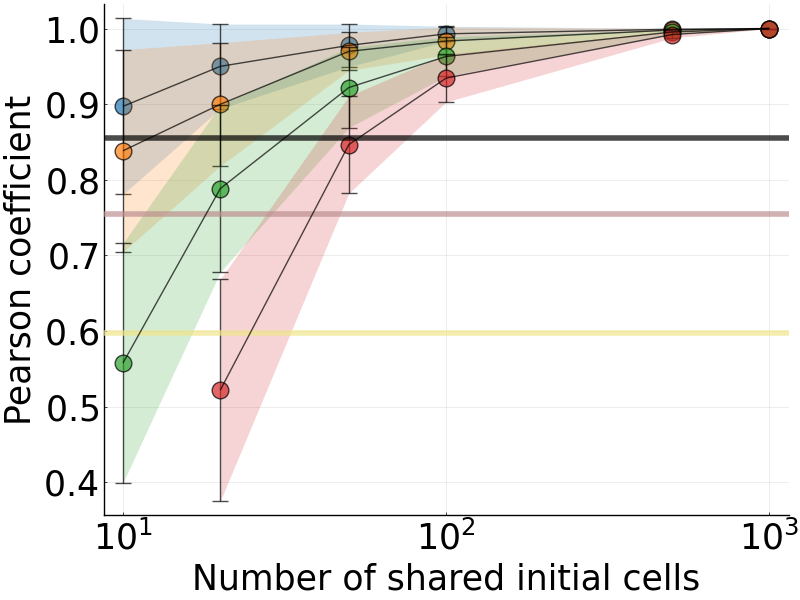

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [43]:
### these are old, need to redo
#initial Pearson value plots
shared_cells_vector = [10,20,50,100,500,1000]
shared_cells_vector_20 = [20,50,100,500,1000]

mean_clone_3 = [0.897106256,0.949973599,0.977729097,0.99297954,0.999065375,1]
std_clone_3 = [0.116262348,0.055967161,0.028194869,0.010025733,0.001236511,0]

mean_clone_5 = [0.838347521,0.899802896,0.969811952,0.983468209,0.998002138,1]
std_clone_5 = [0.133731087,0.081416945,0.0251072,0.018366666,0.002228976,0]

mean_clone_10 = [0.55778169,0.788315491,0.921978271,0.96304726,0.995413925,1]
std_clone_10 = [0.158302619,0.110301118,0.052999009,0.026002732,0.002850987,0]

mean_clone_20 = [0.5218214522499879,0.8465648573706308,0.9344863796810127,0.9920247455643221,1]
std_clone_20 = [0.14652678713631667,0.06427120840003198,0.03152363576659686,0.00447090852570264,0]


mean_vector = [mean_clone_3 mean_clone_5 mean_clone_10]
std_vector = [std_clone_3 std_clone_5 std_clone_10]


plot()
plot!(shared_cells_vector,mean_vector,yerror=std_vector,ribbon=std_vector,fillalpha= 0.2,grid=true,palette=:tab10, xaxis = :log, align="center",alpha=0.7,label = "",xlabel = "Number of shared cells",ylabel = "Pearson coefficient", seriestype =:scatter, markersize = 12,font = "Ariel")
plot!(shared_cells_vector_20,mean_clone_20,yerror=std_clone_20,ribbon=std_clone_20,fillalpha= 0.2,grid=true,palette=:tab10, xaxis = :log, align="center",alpha=0.7,label = "",xlabel = "Number of shared cells",ylabel = "Pearson coefficient", seriestype =:scatter, markersize = 12,font = "Ariel")
hline!([0.8549131142595517], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "black")
hline!([0.7542015800862559], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "rosybrown")
hline!([0.597057621791513], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "khaki")
plot!(shared_cells_vector_20,mean_clone_20,grid=true,color = "Black",alpha=0.7,align="center",label = "",xlabel = "Number of shared initial cells",ylabel = "Pearson coefficient", seriestype =:line, font = "Ariel") 
p1 = plot!(shared_cells_vector,mean_vector,grid=true,color = "Black",alpha=0.7,align="center",label = "",xlabel = "Number of shared initial cells",ylabel = "Pearson coefficient", seriestype =:line, font = "Ariel") 

plot()
plot(p1 ,size =(800,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

┌ Warning: Skipped xaxis arg linear
└ @ Plots /Users/jessekreger/.julia/packages/Plots/FCUr0/src/axes.jl:76
┌ Warning: Skipped xaxis arg linear
└ @ Plots /Users/jessekreger/.julia/packages/Plots/FCUr0/src/axes.jl:76


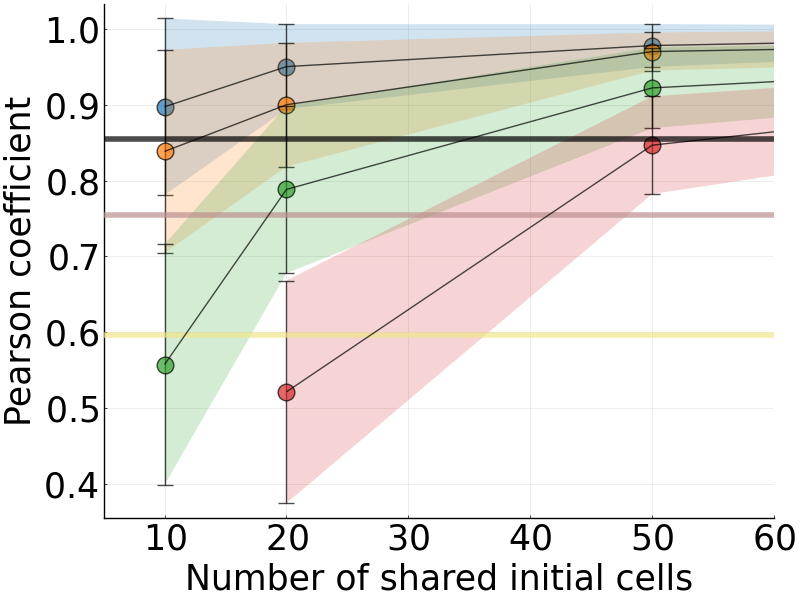

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


In [44]:
### these are old, need to redo
#initial Pearson value plots
plot()
plot!(shared_cells_vector,mean_vector,yerror=std_vector,ribbon=std_vector,fillalpha= 0.2,grid=true,palette=:tab10, xaxis = :linear, xlims = (5,60), align="center",alpha=0.7,label = "",xlabel = "Number of shared cells",ylabel = "Pearson coefficient", seriestype =:scatter, markersize = 12,font = "Ariel")
plot!(shared_cells_vector_20,mean_clone_20,yerror=std_clone_20,ribbon=std_clone_20,fillalpha= 0.2,grid=true,palette=:tab10, xaxis = :linear, align="center",alpha=0.7,label = "",xlabel = "Number of shared cells",ylabel = "Pearson coefficient", seriestype =:scatter, markersize = 12,font = "Ariel")
hline!([0.8549131142595517], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "black")
hline!([0.7542015800862559], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "rosybrown")
hline!([0.597057621791513], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "khaki")
plot!(shared_cells_vector_20,mean_clone_20,grid=true,color = "Black",alpha=0.7,align="center",label = "",xlabel = "Number of shared initial cells",ylabel = "Pearson coefficient", seriestype =:line, font = "Ariel") 
p1 = plot!(shared_cells_vector,mean_vector,grid=true,color = "Black",alpha=0.7,align="center",label = "",xlabel = "Number of shared initial cells",ylabel = "Pearson coefficient", seriestype =:line, font = "Ariel") 


plot()
plot(p1 ,size =(800,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

In [45]:
xfitty = copy(shared_cells_vector)
yfitty = copy(mean_clone_10)

6-element Vector{Float64}:
 0.55778169
 0.788315491
 0.921978271
 0.96304726
 0.995413925
 1.0

In [46]:
@. model2(x, p) = p[1]*x + p[2]
@. model3(x, p) = p[1]*(x/(x+p[2]))
p0y2 = [0.1, 0.7]
p0y3 = [1.0, 0.01]
fity2 = curve_fit(model2, xfitty, yfitty, p0y2)
bf_parmsy2 = coef(fity2)
fity3 = curve_fit(model3, xfitty, yfitty, p0y3)
bf_parmsy3 = coef(fity3)

2-element Vector{Float64}:
 1.0244174934671504
 7.159109859307344

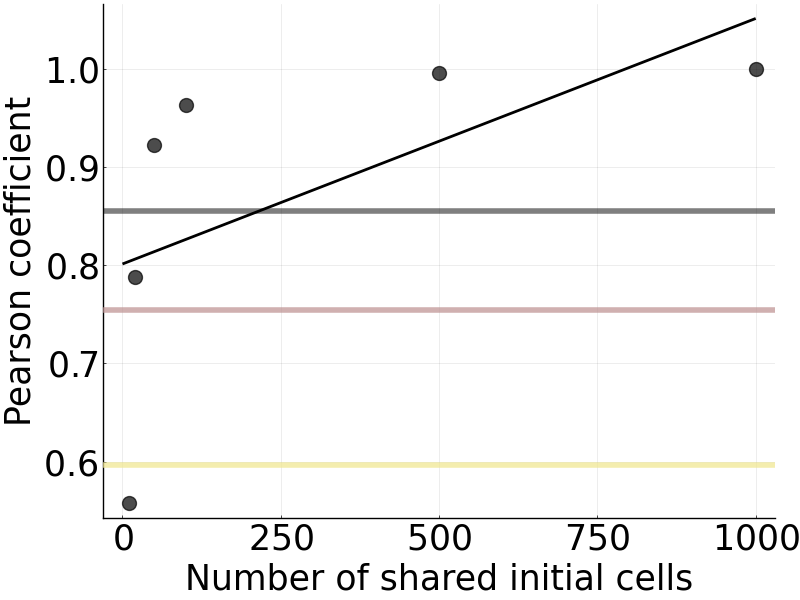

In [47]:
#plot with best fit curve
scatter()
plot!(LinRange(0.0,1000.0,1001), model2(LinRange(0.0,1000.0,1001), [bf_parmsy2[1], bf_parmsy2[2]]), linewidth = 2, color = "Black", alpha = 1)
scatter!(xfitty, yfitty, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of shared initial cells",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
hline!([0.8549131142595517], legend = false, stlye = :dash, lw = 4, alpha = 0.5, color = "black")
hline!([0.7542015800862559], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "rosybrown")
hline!([0.597057621791513], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "khaki")

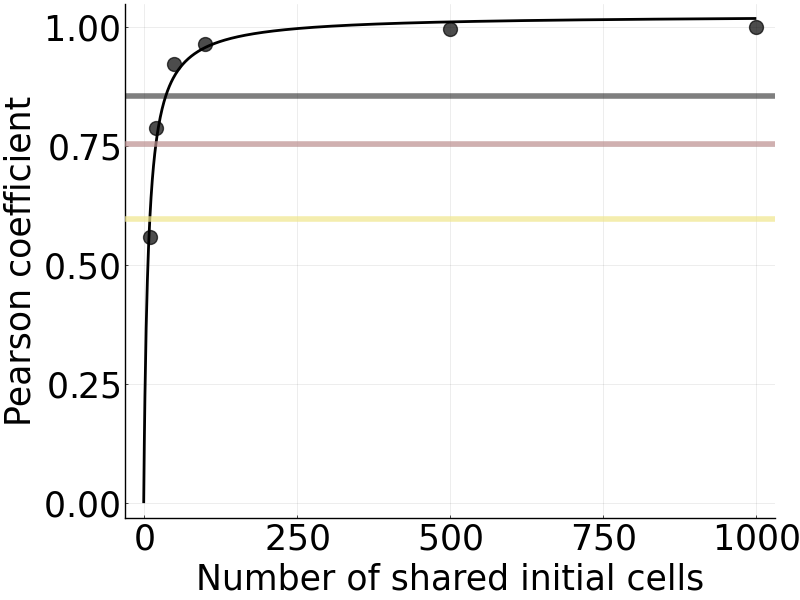

In [48]:
#plot with best fit curve
scatter()
plot!(LinRange(0.0,1000.0,1001), model3(LinRange(0.0,1000.0,1001), [bf_parmsy3[1], bf_parmsy3[2]]), linewidth = 2, color = "Black", alpha = 1)
scatter!(xfitty, yfitty, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of shared initial cells",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
hline!([0.8549131142595517], legend = false, stlye = :dash, lw = 4, alpha = 0.5, color = "black")
hline!([0.7542015800862559], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "rosybrown")
hline!([0.597057621791513], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "khaki")

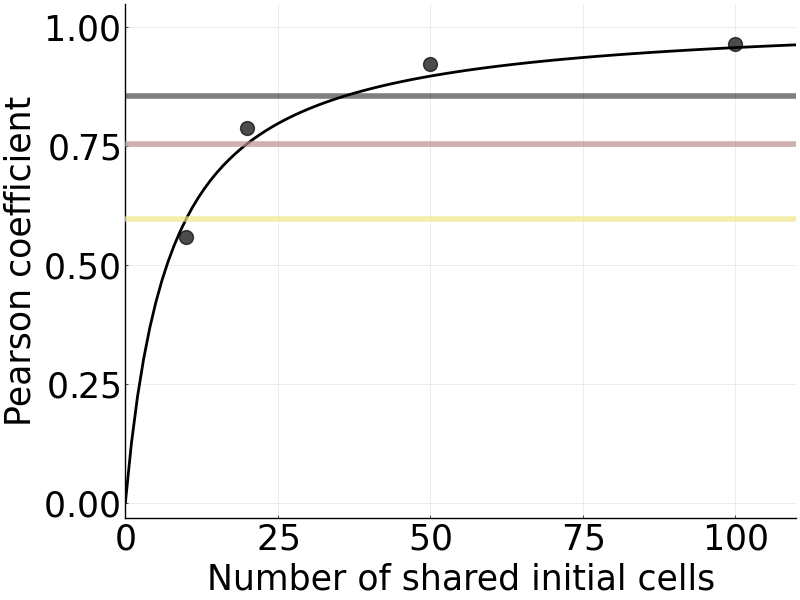

In [49]:
#plot with best fit curve
scatter()
plot!(LinRange(0.0,1000.0,1001), model3(LinRange(0.0,1000.0,1001), [bf_parmsy3[1], bf_parmsy3[2]]), xlims = [0,110], linewidth = 2, color = "Black", alpha = 1)
scatter!(xfitty, yfitty, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of shared initial cells",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
hline!([0.8549131142595517], legend = false, stlye = :dash, lw = 4, alpha = 0.5, color = "black")
hline!([0.7542015800862559], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "rosybrown")
hline!([0.597057621791513], legend = false, stlye = :dash, lw = 4, alpha = 0.7, color = "khaki")

In [50]:
0.8549131142595517/bf_parmsy3[1]*bf_parmsy3[2] / (1-(0.8549131142595517/bf_parmsy3[1]))

36.10772142736672

In [51]:
0.7542015800862559/bf_parmsy3[1]*bf_parmsy3[2] / (1-(0.7542015800862559/bf_parmsy3[1]))

19.981843039309524

In [52]:
0.597057621791513/bf_parmsy3[1]*bf_parmsy3[2] / (1-(0.597057621791513/bf_parmsy3[1]))

10.001877551073514

## Simulation of embryos up to birth (from N_clones cells to N_cells cells)

In [62]:
#define parameters
number_of_cells = 1000 #number of cells
number_of_locations = 1000 #number of fCpG sites
number_of_time_steps = 365*100 #number of time steps (days)
number_of_shared_cells = 20 #number of shared cells
number_of_clones = 10 #number of clones
number_of_twins = 2 #number of twins

α = 50.0/365.0 #cell replacement rate
γ = 5.0/10000.0 #(de)methylation rate

#define clone growth matrices
clone_growth_plot = zeros(number_of_cells,number_of_clones,number_of_twins)
clone_memory = zeros(number_of_cells,number_of_twins)

0.0005

In [63]:
initial_clones = readdlm("initial_clones.csv", ',', '\n')

10×1000 Matrix{Float64}:
 0.0  2.0  2.0  2.0  2.0  2.0  0.0  0.0  …  2.0  0.0  2.0  2.0  2.0  0.0  2.0
 0.0  2.0  2.0  2.0  0.0  0.0  0.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  2.0  2.0  2.0
 2.0  2.0  0.0  0.0  2.0  2.0  2.0  2.0     2.0  0.0  2.0  2.0  0.0  0.0  2.0
 2.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  …  2.0  0.0  2.0  0.0  2.0  0.0  0.0
 2.0  2.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  0.0  2.0  0.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0     2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 0.0  2.0  2.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  0.0  2.0  2.0  2.0

In [64]:
initial_clones

10×1000 Matrix{Float64}:
 0.0  2.0  2.0  2.0  2.0  2.0  0.0  0.0  …  2.0  0.0  2.0  2.0  2.0  0.0  2.0
 0.0  2.0  2.0  2.0  0.0  0.0  0.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  2.0  2.0  2.0
 2.0  2.0  0.0  0.0  2.0  2.0  2.0  2.0     2.0  0.0  2.0  2.0  0.0  0.0  2.0
 2.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  …  2.0  0.0  2.0  0.0  2.0  0.0  0.0
 2.0  2.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  0.0  2.0  0.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0     2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 0.0  2.0  2.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  0.0  2.0  2.0  2.0

In [65]:
fitness_clones = vec(readdlm("fitness_clones.csv", ','))

10-element Vector{Float64}:
 1.0003009780444378
 0.9989951650135787
 1.0021423147665534
 0.9997931719819222
 1.0026592611305987
 1.0008574408700661
 1.0006385414240873
 0.9989171596222025
 1.000467484089032
 1.0001081134718324

In [66]:
@time begin
    
    ave_cells = zeros(number_of_locations, 101, number_of_twins)

    #define initial conditions
    cells = zeros(number_of_cells,number_of_locations)
    cells_twins_initial = zeros(number_of_cells,number_of_locations,number_of_twins)
    shared_cells = zeros(number_of_cells,number_of_locations)
    frequencies = zeros(number_of_clones)

    #define initial number_of_clones cells
    for i = 1:number_of_clones
        shared_cells[i,:] = initial_clones[i,:]
        clone_memory[i,1] = i
        clone_memory[i,2] = i
    end

    #select rest of cells
    for i = number_of_clones+1:number_of_shared_cells

        frequencies = zeros(number_of_clones)
        for k = 1:number_of_clones
            for j = 1:i-1 
                if shared_cells[j,:] == initial_clones[k,:]
                    frequencies[k] = frequencies[k] + 1
                end
            end
        end
        frequencies = frequencies/(i-1)
        for twin_number = 1:number_of_twins
            clone_growth_plot[i,:,twin_number] = copy(frequencies)
        end

        #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent growth
        l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent growth weighted by fitness
        #l = rand(rng, 1:number_of_clones) #uniform growth
        #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform growth weighted by fitness 

        shared_cells[i,:] = initial_clones[l,:]
        clone_memory[i,1] = l
        clone_memory[i,2] = l
    end

    clone_count_shared = zeros(number_of_clones)
    clone_count_unshared = zeros(number_of_clones,number_of_twins)
    for k = 1:number_of_clones
        for j = 1:number_of_shared_cells
            if shared_cells[j,:] == initial_clones[k,:]
                clone_count_shared[k] = clone_count_shared[k] + 1
            end
        end
    end

    for sim_number = 1:number_of_twins

        #define initial conditions
        cells = zeros(number_of_cells,number_of_locations)
        cells[1:number_of_shared_cells,:] = copy(shared_cells[1:number_of_shared_cells,:])
        frequencies = zeros(number_of_clones)

        #select rest of cells
        for i = number_of_shared_cells+1:number_of_cells

            frequencies = zeros(number_of_clones)
            for k = 1:number_of_clones
                for j = 1:i-1 
                    if cells[j,:] == initial_clones[k,:]
                        frequencies[k] = frequencies[k] + 1
                    end
                end
            end
            frequencies = frequencies/(i-1)
            clone_growth_plot[i,:,sim_number] = copy(frequencies)

            #l = rand(Distributions.Categorical(frequencies)) #frequency-dependent
            l = sample(rng, 1:number_of_clones, AnalyticWeights(frequencies.*fitness_clones)) #frequency-dependent weighted by selection
            #l = rand(rng, 1:number_of_clones) #uniform
            #l = sample(rng, 1:number_of_clones, fitness_clones) #uniform weighted by selection 

            cells[i,:] = initial_clones[l,:]
            clone_memory[i,sim_number] = l
        end

        for k = 1:number_of_clones
            for j = 1:number_of_cells
                if cells[j,:] == initial_clones[k,:]
                    clone_count_unshared[k,sim_number] = clone_count_unshared[k,sim_number] + 1
                end
            end
        end

        ave_cells[:,1,sim_number] = mean(cells,dims=1)
        cells_twins_initial[:,:,sim_number] = copy(cells)

    end
    
end

108.180935 seconds (61.93 M allocations: 152.375 GiB, 28.30% gc time, 0.10% compilation time)


In [67]:
#calculate the Pearson coefficient
cor_cells = cor(ave_cells[:,1,:])
vec_cells = cor_cells[tril!(trues(size(cor_cells)), -1)]
initial_value = vec_cells[1]

0.9348195734443238

In [68]:
clone_memory

1000×2 Matrix{Float64}:
  1.0   1.0
  2.0   2.0
  3.0   3.0
  4.0   4.0
  5.0   5.0
  6.0   6.0
  7.0   7.0
  8.0   8.0
  9.0   9.0
 10.0  10.0
  8.0   8.0
  9.0   9.0
  8.0   8.0
  ⋮    
  8.0   8.0
  6.0   8.0
  8.0   7.0
  8.0   8.0
  9.0   8.0
  7.0   7.0
  7.0   7.0
  7.0   9.0
  2.0   8.0
  2.0   2.0
  8.0   1.0
  5.0   8.0

In [69]:
clone_memory = vcat(clone_memory,clone_memory,clone_memory,clone_memory,clone_memory,clone_memory,clone_memory,clone_memory,clone_memory,clone_memory)

10000×2 Matrix{Float64}:
  1.0   1.0
  2.0   2.0
  3.0   3.0
  4.0   4.0
  5.0   5.0
  6.0   6.0
  7.0   7.0
  8.0   8.0
  9.0   9.0
 10.0  10.0
  8.0   8.0
  9.0   9.0
  8.0   8.0
  ⋮    
  8.0   8.0
  6.0   8.0
  8.0   7.0
  8.0   8.0
  9.0   8.0
  7.0   7.0
  7.0   7.0
  7.0   9.0
  2.0   8.0
  2.0   2.0
  8.0   1.0
  5.0   8.0

In [70]:
clone_growth_plot

1000×10×2 Array{Float64, 3}:
[:, :, 1] =
 0.0        0.0        0.0         …  0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.0        0.0        0.0         …  0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.0        0.0        0.0            0.0       0.0        0.0
 0.1        0.1        0.1         …  0.1       0.1        0.1
 0.0909091  0.0909091  0.0909091      0.181818  0.0909091  0.0909091
 0.0833333  0.0833333  0.0833333      0.166667  0.166667   0.0833333
 ⋮                                 ⋱                       
 0.103239   0.0738866  0.00101215     0.362348  0.0799595  0.0151822

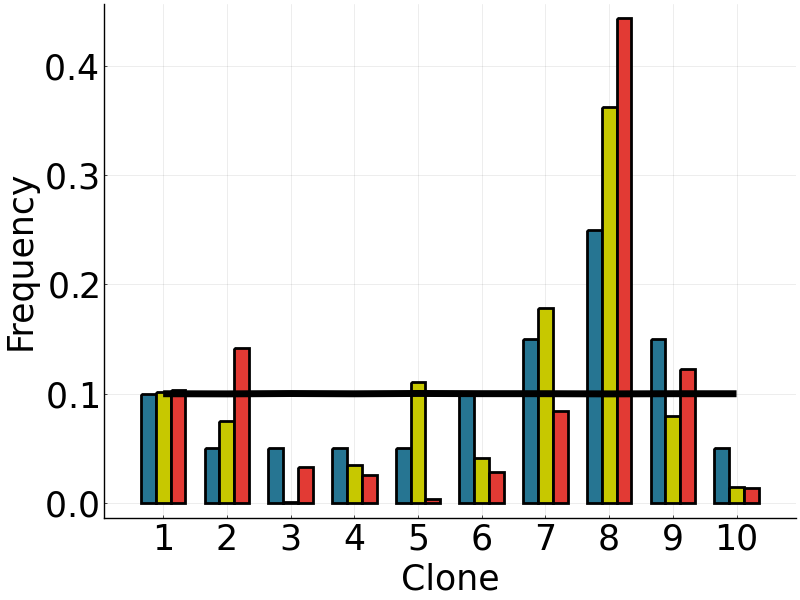

In [71]:
#plot frequencies of simulation
plot()
groupedbar!([clone_count_shared./number_of_shared_cells clone_count_unshared[:,1]./number_of_cells clone_count_unshared[:,2]./number_of_cells], bar_position = :dodge, bar_width=0.7, xticks = ([1:1:number_of_clones;], [1:1:number_of_clones;]), color = [color2 color4 color6], lw = 2, size =(1600/2,600), font = "Ariel", alpha = [1 1 1], legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Clone", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "", titlefontsize=25)
plot!(fitness_clones./sum(fitness_clones), lw = 5, color = "Black")

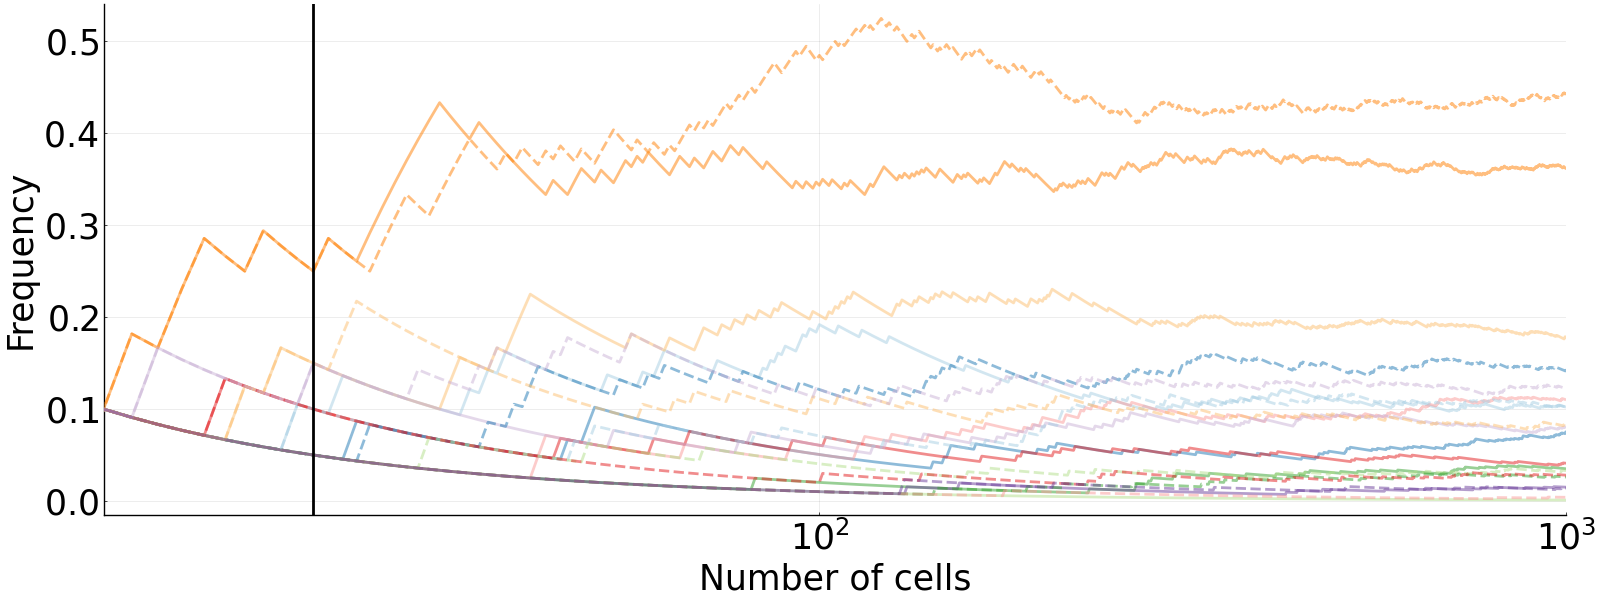

In [72]:
#plot frequencies of simulation
plot()
plot!(clone_growth_plot[:,:,1], xlims = [number_of_clones+1, number_of_cells], xaxis = :log, lw = 2, linestyle = :solid, size =(1600,600), palette = :Paired_10, font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "", titlefontsize=25)
plot!(clone_growth_plot[:,:,2], xlims = [number_of_clones+1, number_of_cells], xaxis = :log, lw = 2, linestyle = :dash, size =(1600,600), palette = :Paired_10, font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "", titlefontsize=25)
vline!([number_of_shared_cells+1], color = "Black", lw = 2)

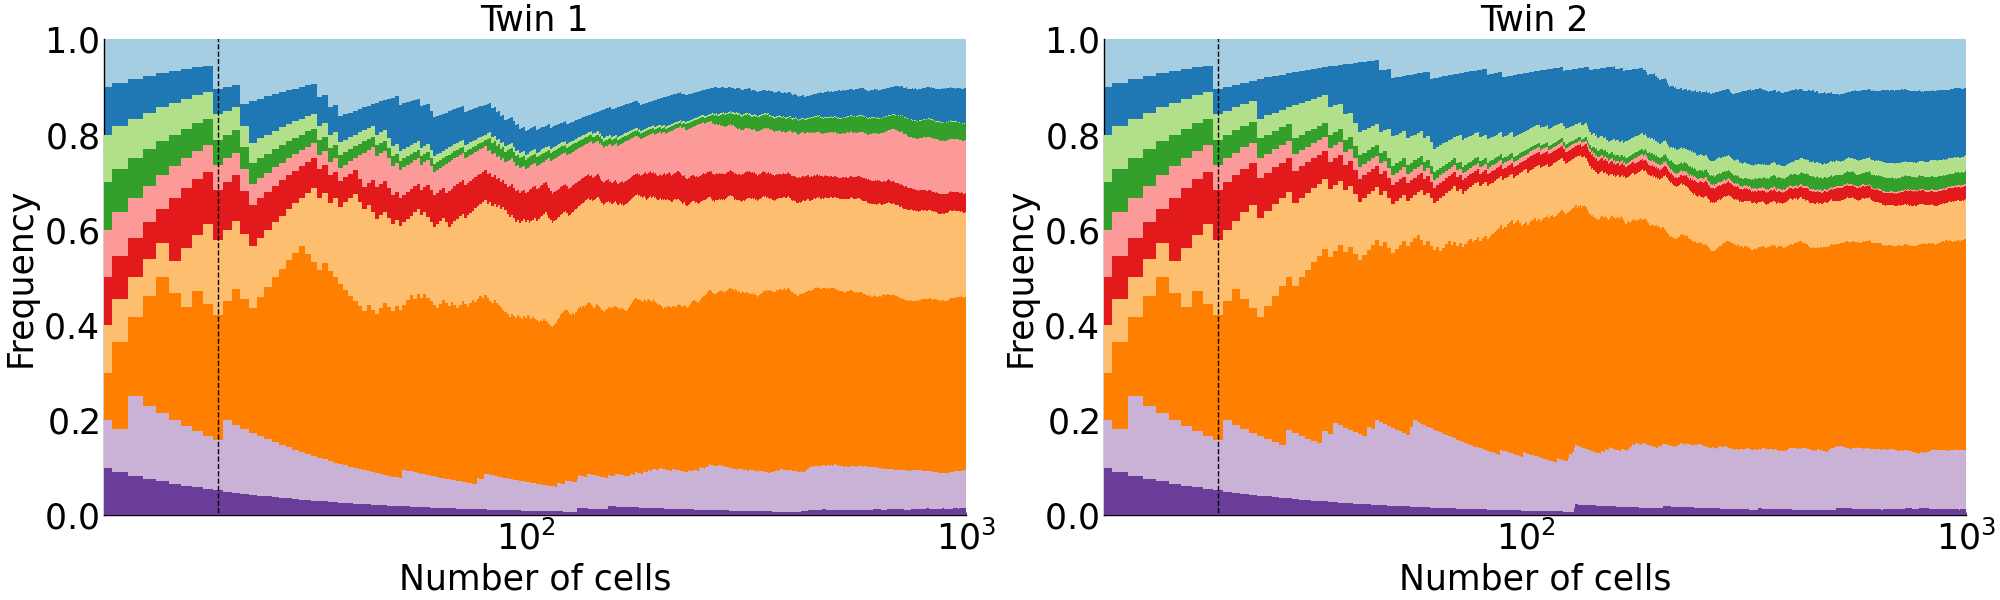

In [73]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot[:,1,1] clone_growth_plot[:,2,1] clone_growth_plot[:,3,1] clone_growth_plot[:,4,1] clone_growth_plot[:,5,1] clone_growth_plot[:,6,1] clone_growth_plot[:,7,1] clone_growth_plot[:,8,1] clone_growth_plot[:,9,1] clone_growth_plot[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Twin 1", titlefontsize=25)
x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
groupedbar!([clone_growth_plot[:,1,2] clone_growth_plot[:,2,2] clone_growth_plot[:,3,2] clone_growth_plot[:,4,2] clone_growth_plot[:,5,2] clone_growth_plot[:,6,2] clone_growth_plot[:,7,2] clone_growth_plot[:,8,2] clone_growth_plot[:,9,2] clone_growth_plot[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Twin 2", titlefontsize=25)
x2 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
plot(x1, x2, layout=grid(1,2), size = (2000,600))

In [74]:
clone_growth_plot_count = zeros(number_of_cells,number_of_clones,number_of_twins)
for i = 1:number_of_cells
    for j = 1:number_of_clones
        for k = 1:number_of_twins
            clone_growth_plot_count[i,j,k] = clone_growth_plot[i,j,k]*(i-1)    
        end
    end
end

In [75]:
clone_growth_plot_count

1000×10×2 Array{Float64, 3}:
[:, :, 1] =
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   0.0   0.0  0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
   1.0   1.0  1.0   1.0    1.0   1.0    1.0    1.0   1.0   1.0
   1.0   1.0  1.0   1.0    1.0   1.0    1.0    2.0   1.0   1.0
   1.0   1.0  1.0   1.0    1.0   1.0    1.0    2.0   2.0   1.0
   ⋮                             ⋮                        
 102.0  73.0  1.0  35.0  110.0  40.0  175.0  358.0  79.0  15.0
 102.0  73.0  1.0 

In [76]:
clone_count_shared

10-element Vector{Float64}:
 2.0
 1.0
 1.0
 1.0
 1.0
 2.0
 3.0
 5.0
 3.0
 1.0

In [77]:
clone_count_unshared

10×2 Matrix{Float64}:
 102.0  103.0
  75.0  142.0
   1.0   33.0
  35.0   26.0
 111.0    4.0
  41.0   28.0
 178.0   84.0
 362.0  443.0
  80.0  123.0
  15.0   14.0

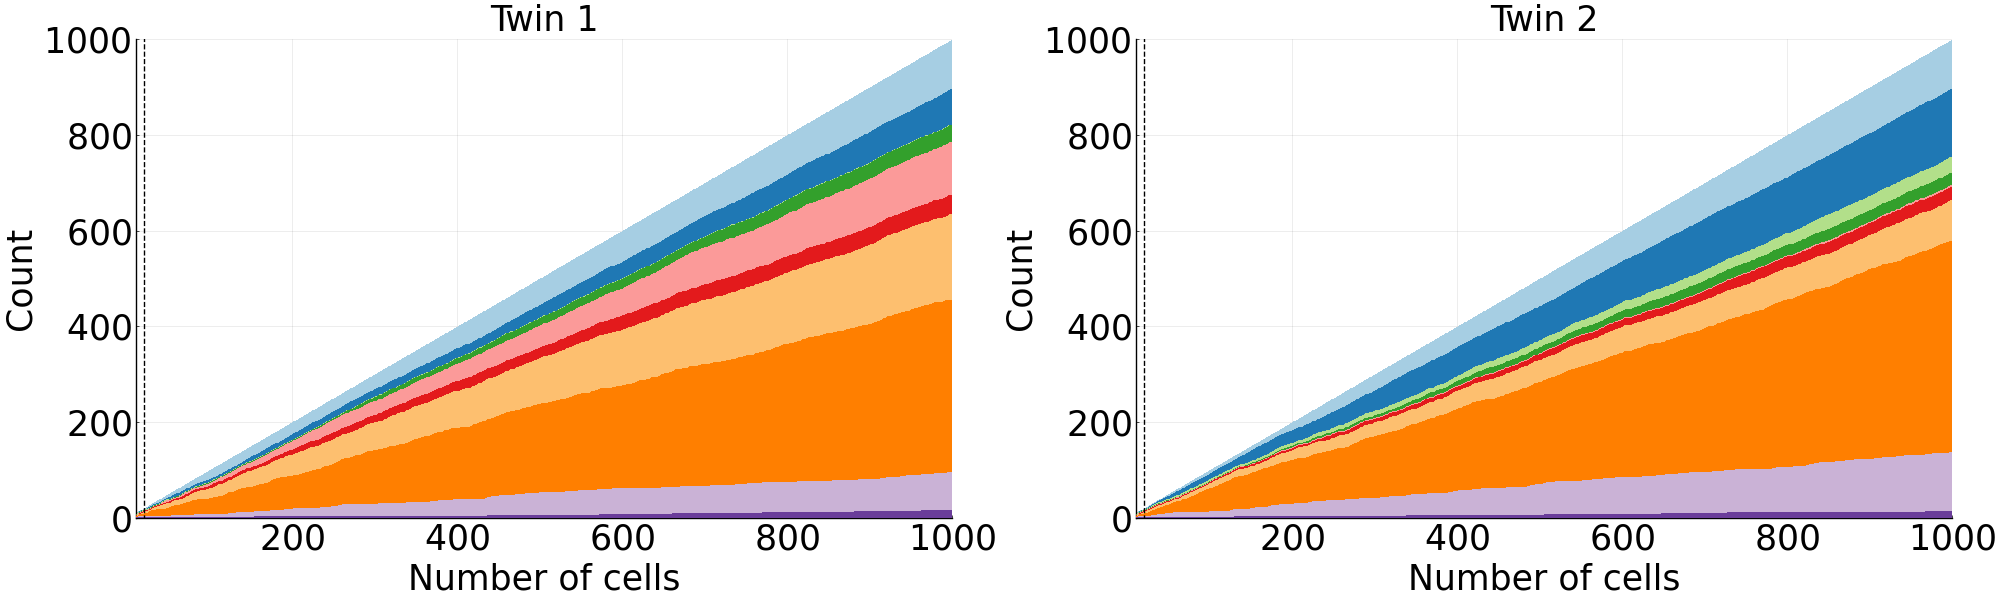

In [78]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot_count[:,1,1] clone_growth_plot_count[:,2,1] clone_growth_plot_count[:,3,1] clone_growth_plot_count[:,4,1] clone_growth_plot_count[:,5,1] clone_growth_plot_count[:,6,1] clone_growth_plot_count[:,7,1] clone_growth_plot_count[:,8,1] clone_growth_plot_count[:,9,1] clone_growth_plot_count[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :identity, ylims = [0.0, number_of_cells], yscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Count", yguidefontsize=25, title = "Twin 1", titlefontsize=25)
x1 = vline!([number_of_shared_cells], color = "Black", style = :dash)
plot()
groupedbar!([clone_growth_plot_count[:,1,2] clone_growth_plot_count[:,2,2] clone_growth_plot_count[:,3,2] clone_growth_plot_count[:,4,2] clone_growth_plot_count[:,5,2] clone_growth_plot_count[:,6,2] clone_growth_plot_count[:,7,2] clone_growth_plot_count[:,8,2] clone_growth_plot_count[:,9,2] clone_growth_plot_count[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :identity, ylims = [0.0, number_of_cells], yscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Count", yguidefontsize=25, title = "Twin 2", titlefontsize=25)
x2 = vline!([number_of_shared_cells], color = "Black", style = :dash)
plot()
plot(x1, x2, layout=grid(1,2), size = (2000,600))

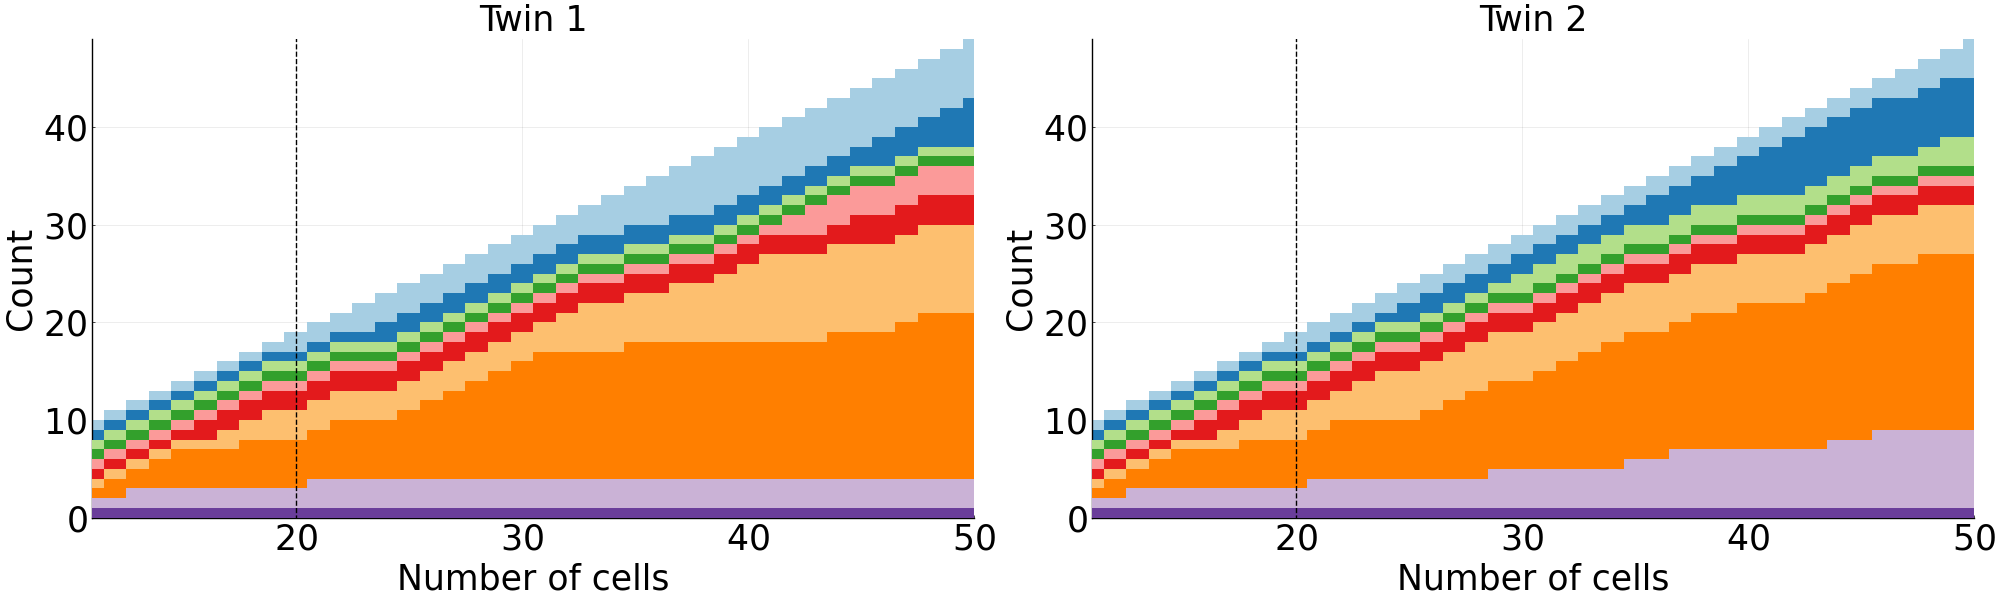

In [79]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot_count[:,1,1] clone_growth_plot_count[:,2,1] clone_growth_plot_count[:,3,1] clone_growth_plot_count[:,4,1] clone_growth_plot_count[:,5,1] clone_growth_plot_count[:,6,1] clone_growth_plot_count[:,7,1] clone_growth_plot_count[:,8,1] clone_growth_plot_count[:,9,1] clone_growth_plot_count[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, 50], xscale = :identity, ylims = [0.0, 49], yscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Count", yguidefontsize=25, title = "Twin 1", titlefontsize=25)
x1 = vline!([number_of_shared_cells], color = "Black", style = :dash)
plot()
groupedbar!([clone_growth_plot_count[:,1,2] clone_growth_plot_count[:,2,2] clone_growth_plot_count[:,3,2] clone_growth_plot_count[:,4,2] clone_growth_plot_count[:,5,2] clone_growth_plot_count[:,6,2] clone_growth_plot_count[:,7,2] clone_growth_plot_count[:,8,2] clone_growth_plot_count[:,9,2] clone_growth_plot_count[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, 50], xscale = :identity, ylims = [0.0, 49], yscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Count", yguidefontsize=25, title = "Twin 2", titlefontsize=25)
x2 = vline!([number_of_shared_cells], color = "Black", style = :dash)
plot()
plot(x1, x2, layout=grid(1,2), size = (2000,600))

In [80]:
cells_twins_initial

1000×1000×2 Array{Float64, 3}:
[:, :, 1] =
 0.0  2.0  2.0  2.0  2.0  2.0  0.0  0.0  …  2.0  0.0  2.0  2.0  2.0  0.0  2.0
 0.0  2.0  2.0  2.0  0.0  0.0  0.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  2.0  2.0  2.0
 2.0  2.0  0.0  0.0  2.0  2.0  2.0  2.0     2.0  0.0  2.0  2.0  0.0  0.0  2.0
 2.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  …  2.0  0.0  2.0  0.0  2.0  0.0  0.0
 2.0  2.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  0.0  2.0  0.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0     2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 0.0  2.0  2.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  0.0  2.0  2.0  2.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0  …  2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 2.0  2.0  2.0  0.0  

In [81]:
cells_twins_initial = vcat(cells_twins_initial,cells_twins_initial,cells_twins_initial,cells_twins_initial,cells_twins_initial,cells_twins_initial,cells_twins_initial,cells_twins_initial,cells_twins_initial,cells_twins_initial)

10000×1000×2 Array{Float64, 3}:
[:, :, 1] =
 0.0  2.0  2.0  2.0  2.0  2.0  0.0  0.0  …  2.0  0.0  2.0  2.0  2.0  0.0  2.0
 0.0  2.0  2.0  2.0  0.0  0.0  0.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  2.0  2.0  2.0
 2.0  2.0  0.0  0.0  2.0  2.0  2.0  2.0     2.0  0.0  2.0  2.0  0.0  0.0  2.0
 2.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  …  2.0  0.0  2.0  0.0  2.0  0.0  0.0
 2.0  2.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  0.0  2.0  0.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0     2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 0.0  2.0  2.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  0.0  2.0  2.0  2.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0  …  2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 2.0  2.0  2.0  0.0 

In [82]:
cells = copy(cells_twins_initial[:,:,1])

10000×1000 Matrix{Float64}:
 0.0  2.0  2.0  2.0  2.0  2.0  0.0  0.0  …  2.0  0.0  2.0  2.0  2.0  0.0  2.0
 0.0  2.0  2.0  2.0  0.0  0.0  0.0  0.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  0.0  0.0  0.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  2.0  2.0  2.0
 2.0  2.0  0.0  0.0  2.0  2.0  2.0  2.0     2.0  0.0  2.0  2.0  0.0  0.0  2.0
 2.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  …  2.0  0.0  2.0  0.0  2.0  0.0  0.0
 2.0  2.0  0.0  0.0  0.0  0.0  0.0  2.0     0.0  0.0  2.0  0.0  0.0  2.0  0.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0     2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 0.0  2.0  2.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  0.0  2.0  2.0  2.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  0.0  …  2.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  0.0  0.0  2.0
 2.0  2.0  2.0  0.0  2.0  2.0  2.0  

## Simulation of human lifespan (from birth to 100 years)

In [83]:
#load initial conditions
initial_clones = readdlm("initial_clones.csv", ',', '\n')
fitness_clones = vec(readdlm("fitness_clones.csv", ','))
cells_twins_initial1 = readdlm("cells_twins_initial_twin1_di.csv", ',', '\n')
cells_twins_initial2 = readdlm("cells_twins_initial_twin2_di.csv", ',', '\n')
clone_growth_plot_twin1 = readdlm("clone_growth_plot_twin1_di.csv", ',', '\n')
clone_growth_plot_twin2 = readdlm("clone_growth_plot_twin2_di.csv", ',', '\n')
clone_memory = readdlm("clone_memory_di.csv", ',', '\n')

10000×2 Matrix{Float64}:
  1.0   1.0
  2.0   2.0
  3.0   3.0
  4.0   4.0
  5.0   5.0
  6.0   6.0
  7.0   7.0
  8.0   8.0
  9.0   9.0
 10.0  10.0
 10.0  10.0
  4.0   4.0
  9.0   9.0
  ⋮    
  2.0  10.0
 10.0   4.0
  8.0   4.0
  4.0   8.0
  9.0   3.0
  4.0   9.0
  7.0  10.0
  4.0   9.0
 10.0   5.0
  4.0   1.0
  9.0   4.0
  3.0   5.0

In [86]:
#define parameters
number_of_cells = 10000 #number of cells
number_of_locations = 1000 #number of fCpG sites
number_of_time_steps = 365*100 #number of time steps (days)
number_of_shared_cells = 36 #number of shared cells
number_of_clones = 10 #number of clones
number_of_twins = 2 #number of twins

α = 1.0/(365.0)  #cell replacement rate
γ = 0.005 #(de)methylation rate

#define clone growth matrices
cells_twins_initial = zeros(number_of_cells,number_of_locations,number_of_twins)
cells_twins_initial[:,:,1] = copy(cells_twins_initial1)
cells_twins_initial[:,:,2] = copy(cells_twins_initial2)
cells_twins_initial

clone_growth_plot = zeros(1000,number_of_clones,number_of_twins)
clone_growth_plot[:,:,1] = copy(clone_growth_plot_twin1)
clone_growth_plot[:,:,2] = copy(clone_growth_plot_twin2)
clone_growth_plot

1000×10×2 Array{Float64, 3}:
[:, :, 1] =
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           0.0        0.0        0.0
 0.1        0.1        0.1        …  0.1        0.1        0.1
 0.0909091  0.0909091  0.0909091     0.0909091  0.0909091  0.181818
 0.0833333  0.0833333  0.0833333     0.0833333  0.0833333  0.166667
 ⋮                                ⋱                        
 0.0637652  0.131579   0.131579      0.0597166  0.0789474  0.0668016
 

In [95]:
@time begin
    
    ave_cells = zeros(number_of_locations, 101, number_of_twins)
    clone_memory_dynamic = copy(clone_memory)
    fitness_cells = zeros(number_of_cells)

    clone_growth_plot_sim = zeros(100,number_of_clones,number_of_twins)

    for sim_number = 1:number_of_twins

        cells = copy(cells_twins_initial[:,:,sim_number])

        for fit = 1:number_of_cells
            fitness_cells[fit] = copy(fitness_clones[Int(clone_memory_dynamic[fit,sim_number])])
        end

        time_years = 1
        t = 0
        print(t/365, " years \n")
        ave_cells[:,1,sim_number] = mean(cells,dims=1)

        #simulation
        for t = 1:number_of_time_steps
            if mod(t,365) == 0
                time_years = time_years + 1
                if mod(time_years-1,10) == 0
                    print(t/365, " years \n")
                end
                ave_cells[:,time_years,sim_number] = mean(cells,dims=1)  

                counting_clones = copy(countmap(clone_memory_dynamic[:,sim_number]))
                for clone_counter = 1:length(values(counting_clones))
                    clone_growth_plot_sim[Int(t/365),Int(collect(keys(counting_clones))[clone_counter]),sim_number] = collect(values(counting_clones))[clone_counter]
                end
            end

            for i = 1:number_of_cells
                if rand(rng) < α #cell replacement event

                    pick = sample(rng, 1:number_of_cells, AnalyticWeights(fitness_cells))

                    cells[i,:] = copy(cells[pick,:])
                    clone_memory_dynamic[i,sim_number] = copy(clone_memory_dynamic[pick,sim_number])
                    fitness_cells[i] = copy(fitness_clones[Int(clone_memory_dynamic[pick,sim_number])])

                    for j = 1:number_of_locations                 
                        if rand(rng) < γ #(de)methylation event
                            if cells[i,j] == 0
                                cells[i,j] = 1
                            elseif cells[i,j] == 1
                                if rand(rng) < 0.5
                                    cells[i,j] = 0
                                else
                                    cells[i,j] = 2
                                end
                            elseif cells[i,j] == 2
                                cells[i,j] = 1
                            else
                                println("There is an error")
                            end
                        end
                    end
                end
            end 
        end
    end
    
end

0.0 years 
10.0 years 
20.0 years 
30.0 years 
40.0 years 
50.0 years 
60.0 years 
70.0 years 
80.0 years 
90.0 years 
100.0 years 
0.0 years 
10.0 years 
20.0 years 
30.0 years 
40.0 years 
50.0 years 
60.0 years 
70.0 years 
80.0 years 
90.0 years 
100.0 years 
389.560159 seconds (8.86 G allocations: 203.373 GiB, 9.13% gc time)


In [96]:
clone_memory_dynamic

10000×2 Matrix{Float64}:
  2.0   3.0
  5.0   9.0
  9.0  10.0
  2.0   8.0
  4.0   3.0
  9.0   9.0
  3.0   9.0
  4.0  10.0
  4.0  10.0
  6.0   5.0
  4.0   3.0
  9.0   9.0
  2.0   9.0
  ⋮    
  4.0   9.0
  3.0   9.0
  5.0   3.0
 10.0   3.0
  3.0   5.0
  4.0   9.0
  2.0   7.0
  3.0  10.0
  2.0   4.0
  2.0   3.0
  4.0   3.0
  4.0   9.0

In [97]:
clone_growth_plot_sim

100×10×2 Array{Float64, 3}:
[:, :, 1] =
 660.0  1215.0  1314.0  3881.0  251.0  307.0  299.0  569.0  786.0   718.0
 641.0  1221.0  1330.0  3817.0  271.0  327.0  306.0  540.0  763.0   784.0
 575.0  1218.0  1323.0  3882.0  261.0  363.0  337.0  553.0  702.0   786.0
 532.0  1177.0  1405.0  3980.0  268.0  377.0  307.0  482.0  714.0   758.0
 521.0  1135.0  1457.0  3906.0  296.0  415.0  318.0  508.0  731.0   713.0
 533.0  1082.0  1382.0  3984.0  318.0  357.0  315.0  528.0  789.0   712.0
 535.0  1164.0  1386.0  3926.0  324.0  354.0  300.0  541.0  809.0   661.0
 512.0  1146.0  1349.0  4019.0  359.0  311.0  331.0  543.0  759.0   671.0
 439.0  1193.0  1333.0  4001.0  373.0  363.0  337.0  540.0  724.0   697.0
 434.0  1174.0  1322.0  3968.0  374.0  347.0  353.0  523.0  740.0   765.0
 464.0  1159.0  1337.0  3963.0  365.0  334.0  374.0  541.0  725.0   738.0
 461.0  1094.0  1271.0  4051.0  389.0  327.0  352.0  575.0  694.0   786.0
 481.0  1113.0  1328.0  3897.0  367.0  368.0  358.0  559.0  738.0   791.

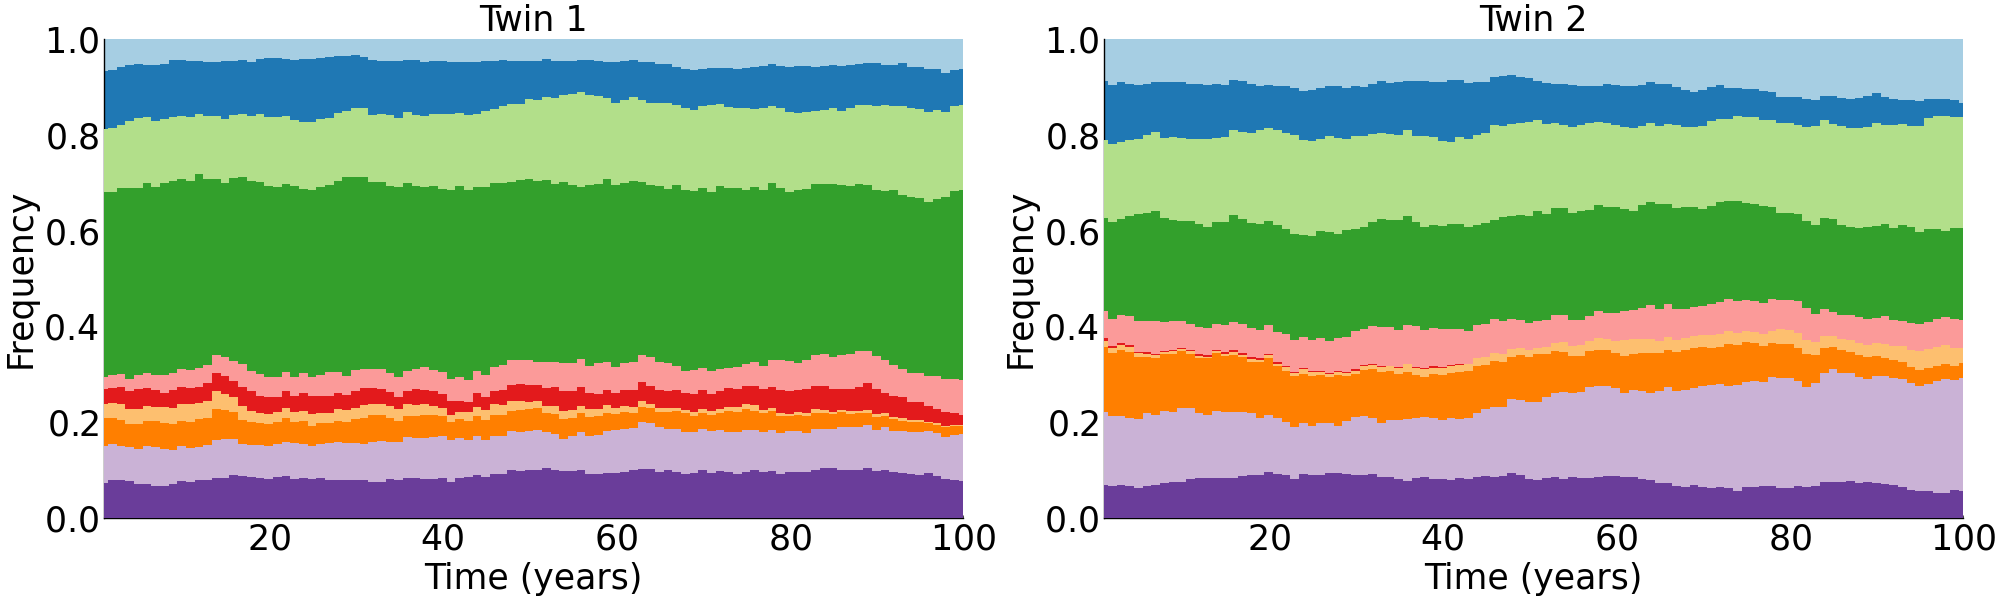

In [99]:
#plot frequencies of simulation
plot()
x1 = groupedbar!([clone_growth_plot_sim[:,1,1]./number_of_cells clone_growth_plot_sim[:,2,1]./number_of_cells clone_growth_plot_sim[:,3,1]./number_of_cells clone_growth_plot_sim[:,4,1]./number_of_cells clone_growth_plot_sim[:,5,1]./number_of_cells clone_growth_plot_sim[:,6,1]./number_of_cells clone_growth_plot_sim[:,7,1]./number_of_cells clone_growth_plot_sim[:,8,1]./number_of_cells clone_growth_plot_sim[:,9,1]./number_of_cells clone_growth_plot_sim[:,10,1]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Twin 1", titlefontsize=25, ylims = [0,1])
plot()
x2 = groupedbar!([clone_growth_plot_sim[:,1,2]./number_of_cells clone_growth_plot_sim[:,2,2]./number_of_cells clone_growth_plot_sim[:,3,2]./number_of_cells clone_growth_plot_sim[:,4,2]./number_of_cells clone_growth_plot_sim[:,5,2]./number_of_cells clone_growth_plot_sim[:,6,2]./number_of_cells clone_growth_plot_sim[:,7,2]./number_of_cells clone_growth_plot_sim[:,8,2]./number_of_cells clone_growth_plot_sim[:,9,2]./number_of_cells clone_growth_plot_sim[:,10,2]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Twin 2", titlefontsize=25, ylims = [0,1])
plot()
plot(x1, x2, layout=grid(1,2), size = (2000,600))

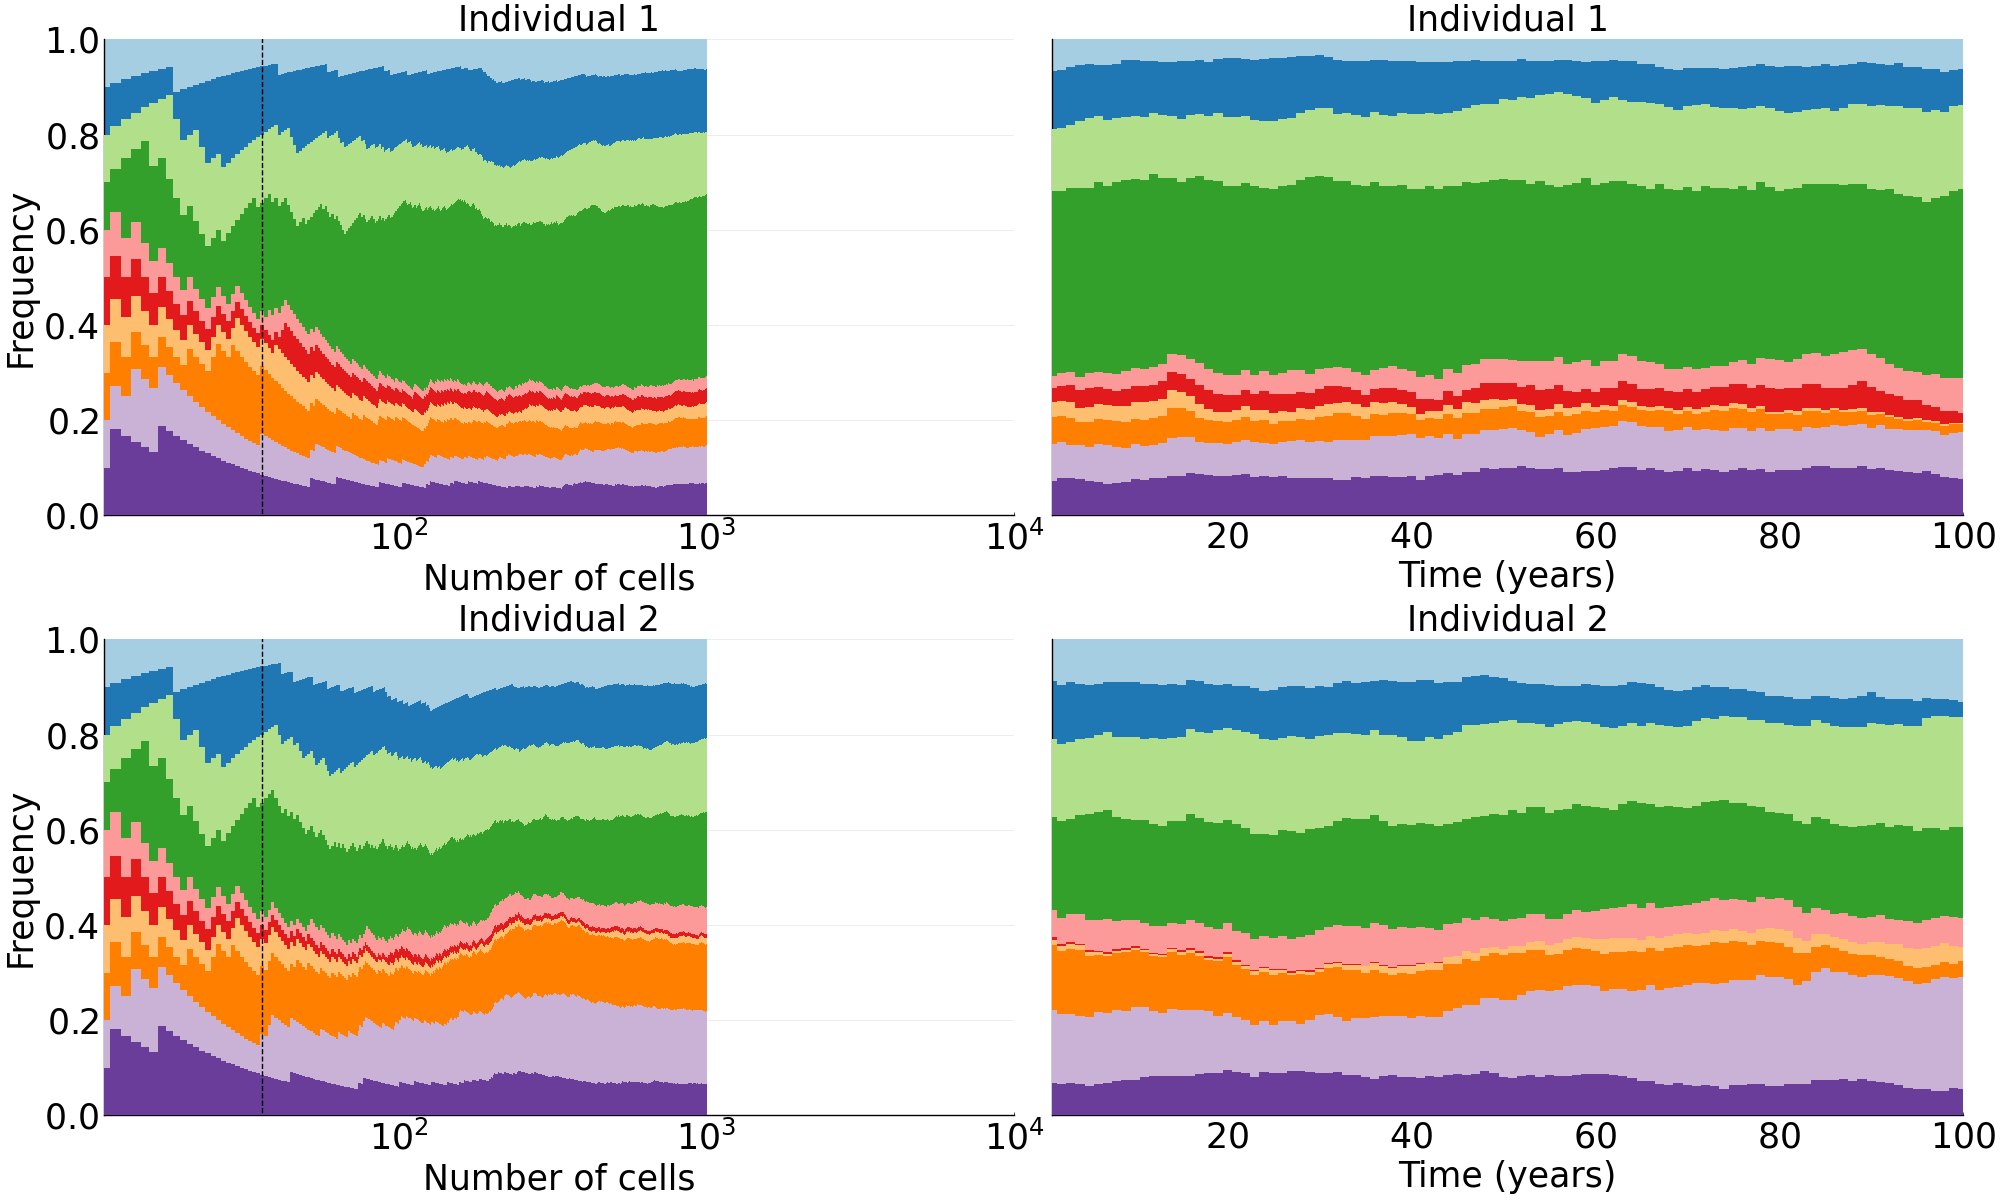

In [102]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot[:,1,1] clone_growth_plot[:,2,1] clone_growth_plot[:,3,1] clone_growth_plot[:,4,1] clone_growth_plot[:,5,1] clone_growth_plot[:,6,1] clone_growth_plot[:,7,1] clone_growth_plot[:,8,1] clone_growth_plot[:,9,1] clone_growth_plot[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 1", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t1x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
groupedbar!([clone_growth_plot[:,1,2] clone_growth_plot[:,2,2] clone_growth_plot[:,3,2] clone_growth_plot[:,4,2] clone_growth_plot[:,5,2] clone_growth_plot[:,6,2] clone_growth_plot[:,7,2] clone_growth_plot[:,8,2] clone_growth_plot[:,9,2] clone_growth_plot[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, number_of_cells], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 2", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t2x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])

plot()
t1x2 = groupedbar!([clone_growth_plot_sim[:,1,1]./number_of_cells clone_growth_plot_sim[:,2,1]./number_of_cells clone_growth_plot_sim[:,3,1]./number_of_cells clone_growth_plot_sim[:,4,1]./number_of_cells clone_growth_plot_sim[:,5,1]./number_of_cells clone_growth_plot_sim[:,6,1]./number_of_cells clone_growth_plot_sim[:,7,1]./number_of_cells clone_growth_plot_sim[:,8,1]./number_of_cells clone_growth_plot_sim[:,9,1]./number_of_cells clone_growth_plot_sim[:,10,1]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Individual 1", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yaxis = nothing)
plot()
t2x2 = groupedbar!([clone_growth_plot_sim[:,1,2]./number_of_cells clone_growth_plot_sim[:,2,2]./number_of_cells clone_growth_plot_sim[:,3,2]./number_of_cells clone_growth_plot_sim[:,4,2]./number_of_cells clone_growth_plot_sim[:,5,2]./number_of_cells clone_growth_plot_sim[:,6,2]./number_of_cells clone_growth_plot_sim[:,7,2]./number_of_cells clone_growth_plot_sim[:,8,2]./number_of_cells clone_growth_plot_sim[:,9,2]./number_of_cells clone_growth_plot_sim[:,10,2]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Individual 2", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yaxis = nothing)
plot()
plot(t1x1, t1x2, t2x1, t2x2, layout=grid(2,2), size = (2000,1200))

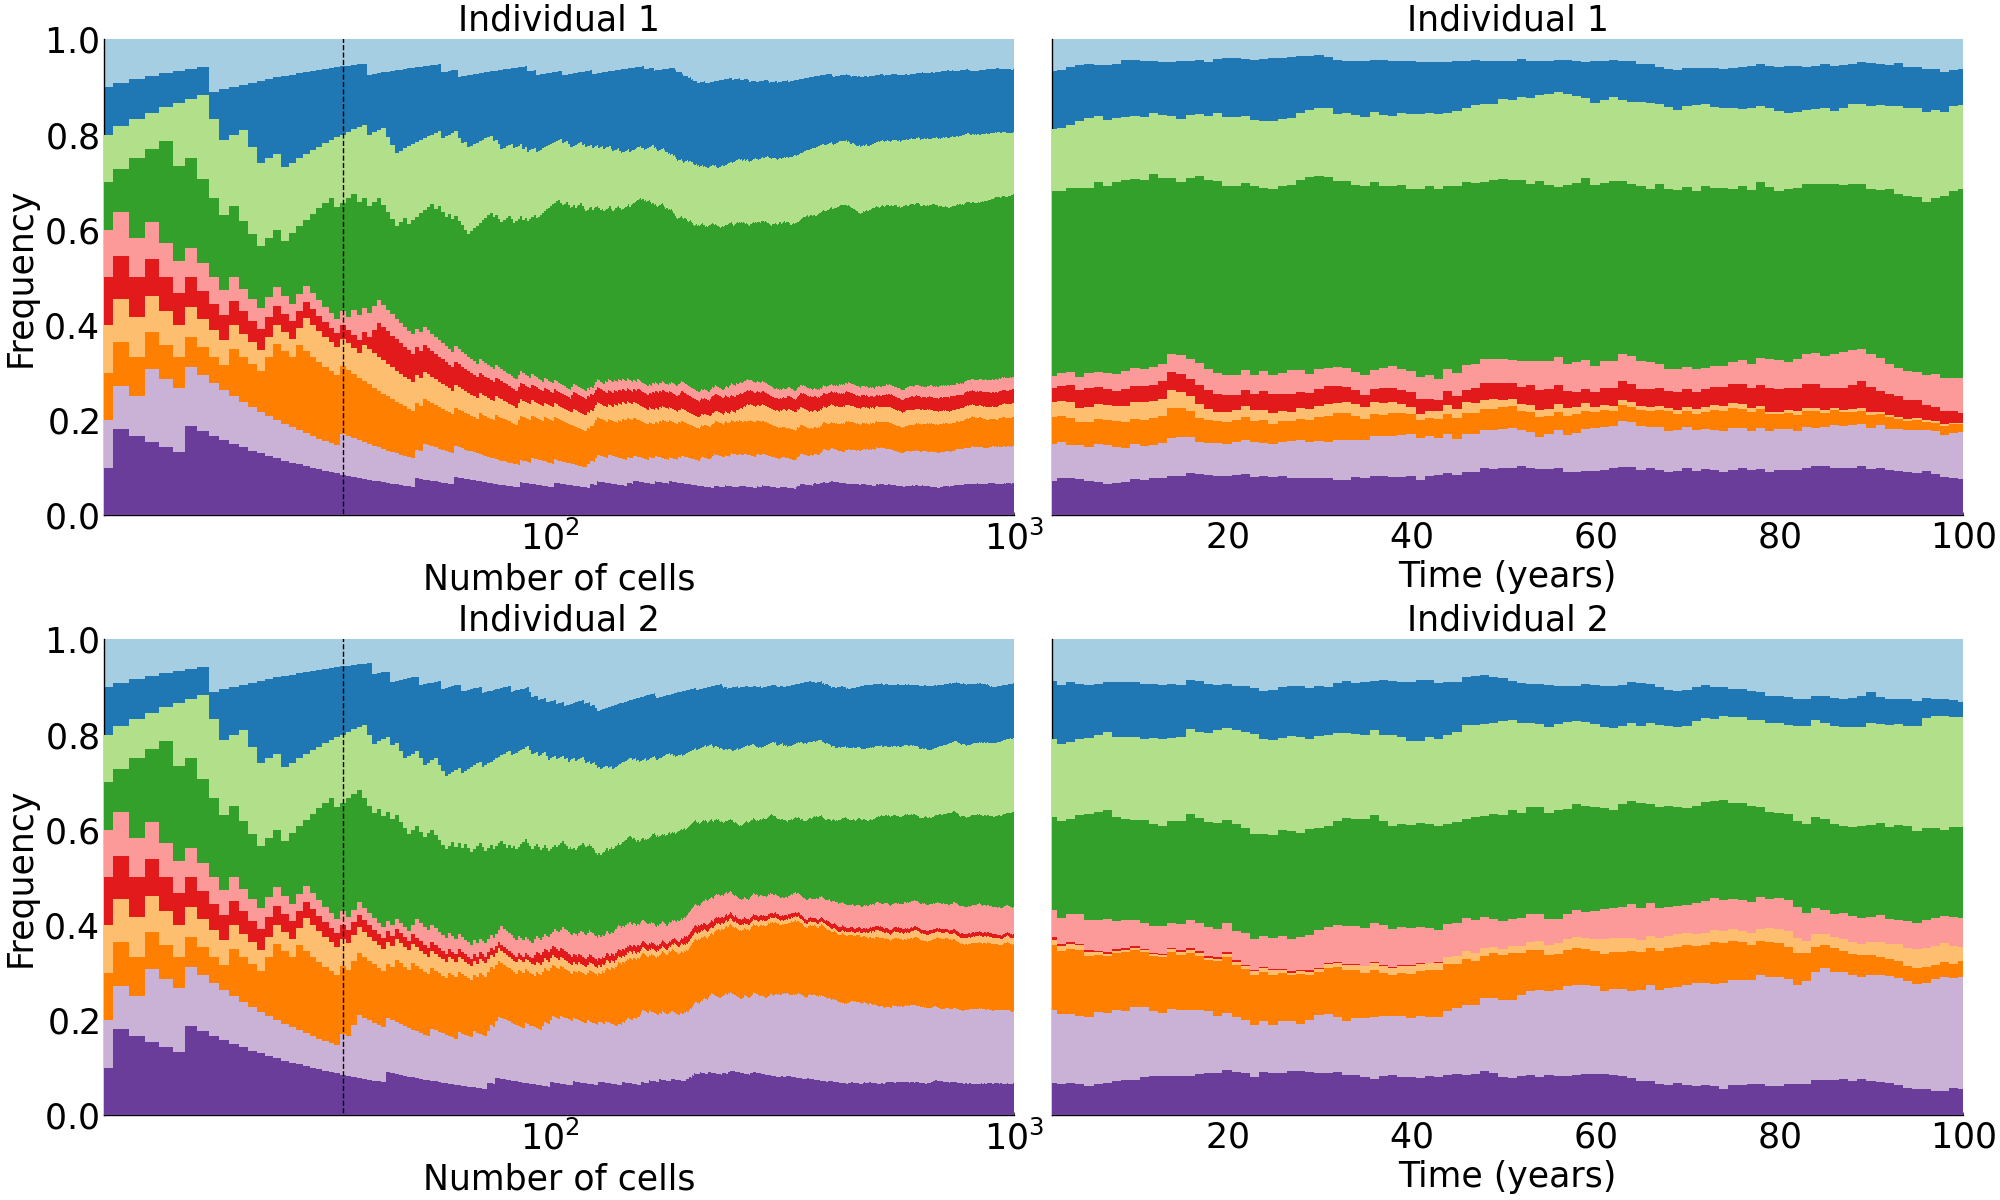

In [103]:
#plot frequencies of simulation
plot()
groupedbar!([clone_growth_plot[:,1,1] clone_growth_plot[:,2,1] clone_growth_plot[:,3,1] clone_growth_plot[:,4,1] clone_growth_plot[:,5,1] clone_growth_plot[:,6,1] clone_growth_plot[:,7,1] clone_growth_plot[:,8,1] clone_growth_plot[:,9,1] clone_growth_plot[:,10,1]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, 1000], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 1", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t1x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])
plot()
groupedbar!([clone_growth_plot[:,1,2] clone_growth_plot[:,2,2] clone_growth_plot[:,3,2] clone_growth_plot[:,4,2] clone_growth_plot[:,5,2] clone_growth_plot[:,6,2] clone_growth_plot[:,7,2] clone_growth_plot[:,8,2] clone_growth_plot[:,9,2] clone_growth_plot[:,10,2]], bar_position = :stack, linecolor = nothing, xlims = [number_of_clones+1, 1000], xscale = :log10, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Number of cells", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Individual 2", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t2x1 = vline!([number_of_shared_cells], color = "Black", style = :dash, ylims = [0,1])

plot()
t1x2 = groupedbar!([clone_growth_plot_sim[:,1,1]./number_of_cells clone_growth_plot_sim[:,2,1]./number_of_cells clone_growth_plot_sim[:,3,1]./number_of_cells clone_growth_plot_sim[:,4,1]./number_of_cells clone_growth_plot_sim[:,5,1]./number_of_cells clone_growth_plot_sim[:,6,1]./number_of_cells clone_growth_plot_sim[:,7,1]./number_of_cells clone_growth_plot_sim[:,8,1]./number_of_cells clone_growth_plot_sim[:,9,1]./number_of_cells clone_growth_plot_sim[:,10,1]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Individual 1", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yaxis = nothing)
plot()
t2x2 = groupedbar!([clone_growth_plot_sim[:,1,2]./number_of_cells clone_growth_plot_sim[:,2,2]./number_of_cells clone_growth_plot_sim[:,3,2]./number_of_cells clone_growth_plot_sim[:,4,2]./number_of_cells clone_growth_plot_sim[:,5,2]./number_of_cells clone_growth_plot_sim[:,6,2]./number_of_cells clone_growth_plot_sim[:,7,2]./number_of_cells clone_growth_plot_sim[:,8,2]./number_of_cells clone_growth_plot_sim[:,9,2]./number_of_cells clone_growth_plot_sim[:,10,2]./number_of_cells], bar_position = :stack, linecolor = nothing, xlims = [1, 100], xscale = :identity, bar_width=1, palette = :Paired_10, lw = 2, size =(1600/2,600), font = "Ariel", legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Time (years)", xguidefontsize=25, yguidefontsize=25, title = "Individual 2", titlefontsize=25, ylims = [0,1], yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yaxis = nothing)
plot()
plot(t1x1, t1x2, t2x1, t2x2, layout=grid(2,2), size = (2000,1200))

In [104]:
mean(initial_clones,dims=1)/2

1×1000 Matrix{Float64}:
 0.4  0.8  0.5  0.5  0.5  0.3  0.3  0.6  …  0.6  0.4  0.7  0.5  0.6  0.6  0.6

In [105]:
ave_cells = ave_cells/2

1000×101×2 Array{Float64, 3}:
[:, :, 1] =
 0.144  0.14405  0.14875  0.1574   …  0.27     0.2746   0.2769   0.28385
 0.588  0.5798   0.5843   0.575       0.56775  0.55645  0.5505   0.55125
 0.351  0.3468   0.35275  0.3513      0.3569   0.3597   0.3508   0.3435
 0.422  0.4215   0.4299   0.4267      0.46095  0.44775  0.4318   0.41955
 0.296  0.2992   0.30175  0.2904      0.34585  0.3462   0.35275  0.35545
 0.148  0.1493   0.14875  0.14595  …  0.2556   0.2624   0.2603   0.2571
 0.153  0.15555  0.1627   0.1662      0.30185  0.30095  0.3023   0.30215
 0.717  0.7242   0.726    0.7288      0.69035  0.6888   0.7043   0.706
 0.594  0.5875   0.5785   0.5784      0.52425  0.53335  0.53255  0.53565
 0.577  0.5782   0.57005  0.573       0.49655  0.5044   0.51465  0.51375
 0.464  0.4599   0.4708   0.4662   …  0.56025  0.54645  0.53825  0.5422
 0.562  0.55705  0.56045  0.55165     0.5688   0.5543   0.54755  0.5423
 0.164  0.16615  0.17125  0.1711      0.29685  0.2943   0.30315  0.3024
 ⋮              

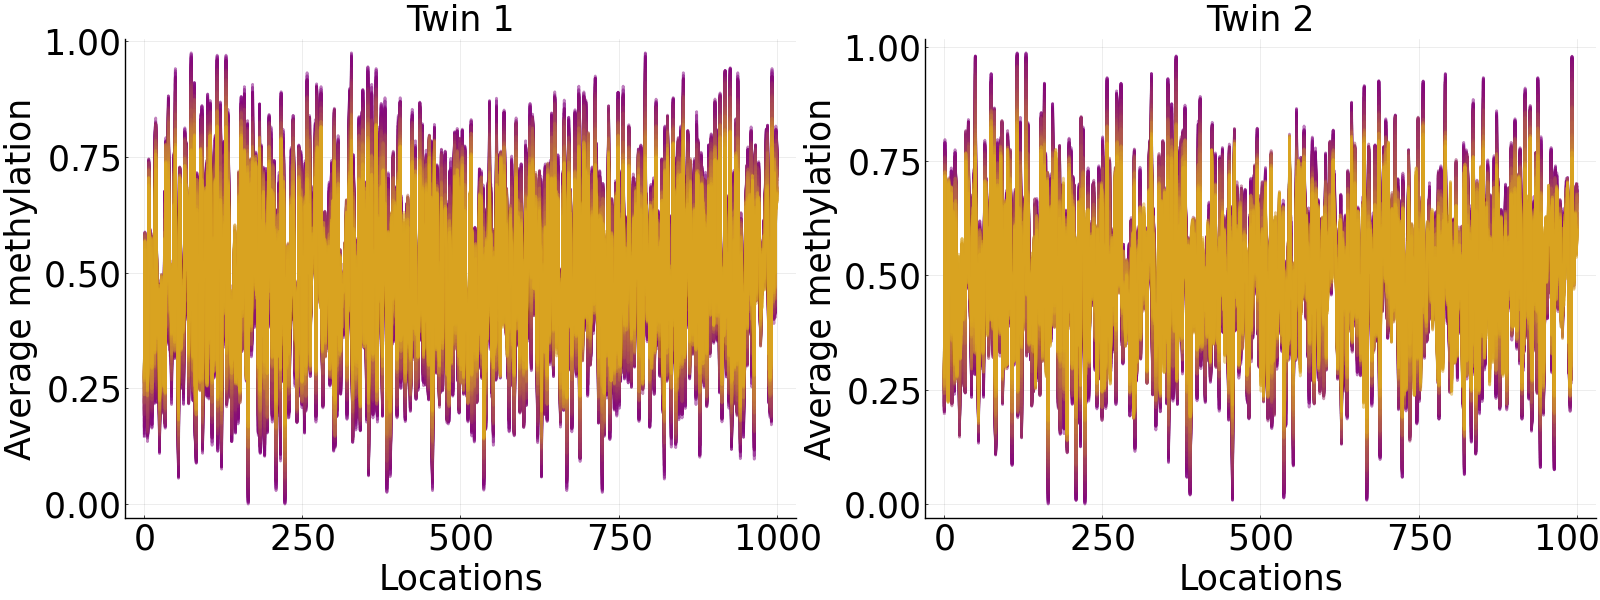

In [107]:
#plot average methylation at each location
plot()
x1 = plot(ave_cells[:,:,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette([:purple, :"Goldenrod"], 101), font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Locations", xguidefontsize=25, ylabel="Average methylation", yguidefontsize=25, title = "Twin 1", titlefontsize=25)
x2 = plot(ave_cells[:,:,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette([:purple, :"Goldenrod"], 101), font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Locations", xguidefontsize=25, ylabel="Average methylation", yguidefontsize=25, title = "Twin 2", titlefontsize=25)
plot(x1, x2, layout=grid(1,2), size = (1600,600))

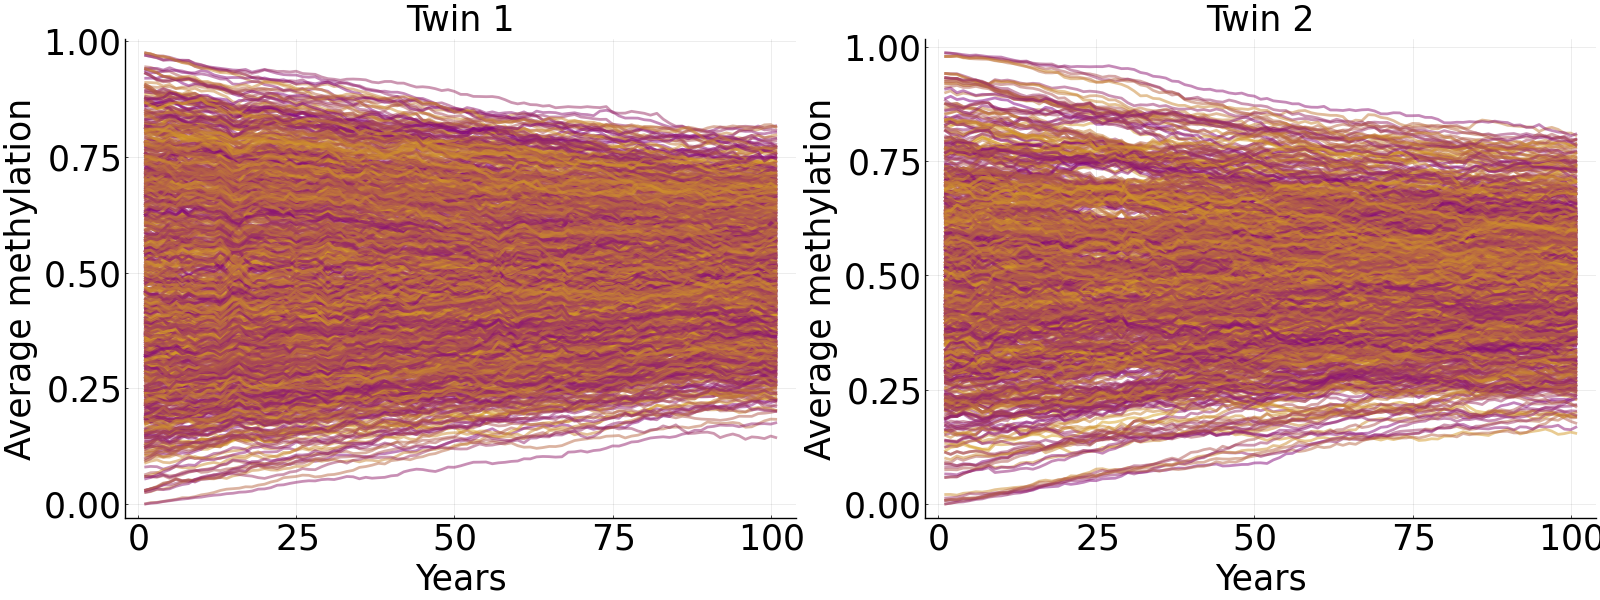

In [108]:
#plot average methylation over time
plot()
x1 = plot(transpose(ave_cells[:,:,1]), lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette([:purple, :"Goldenrod"], 101), font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Years", xguidefontsize=25, ylabel="Average methylation", yguidefontsize=25, title = "Twin 1", titlefontsize=25)
x2 = plot(transpose(ave_cells[:,:,2]), lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette([:purple, :"Goldenrod"], 101), font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Years", xguidefontsize=25, ylabel="Average methylation", yguidefontsize=25, title = "Twin 2", titlefontsize=25)
plot(x1, x2, layout=grid(1,2), size = (1600,600))

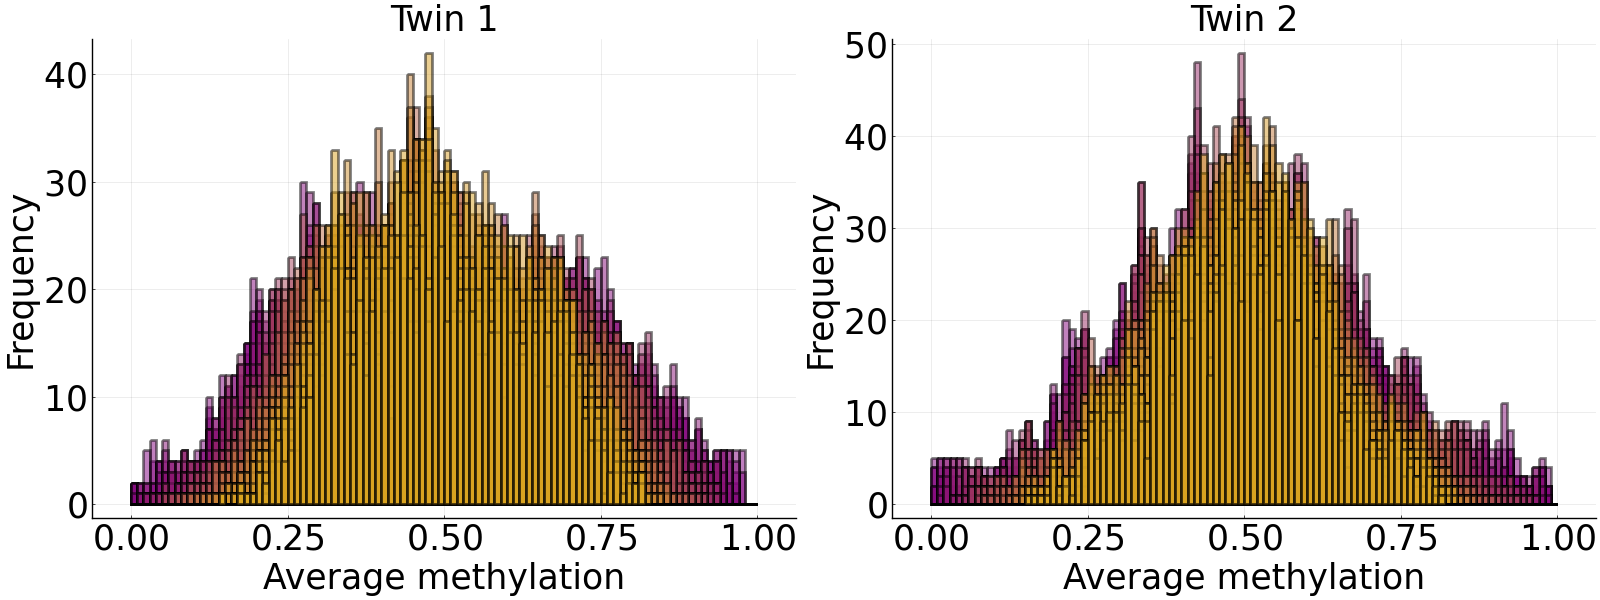

In [109]:
#histograms of average methylation over time
plot()
x1 = histogram(ave_cells[:,:,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette([:purple, :"Goldenrod"], 101), bins = 0:0.01:1, font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Average methylation", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Twin 1", titlefontsize=25)
x2 = histogram(ave_cells[:,:,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette([:purple, :"Goldenrod"], 101), bins = 0:0.01:1, font = "Ariel", alpha = 0.5, legend = false, xtickfontsize=25, ytickfontsize=25, xlabel="Average methylation", xguidefontsize=25, ylabel="Frequency", yguidefontsize=25, title = "Twin 2", titlefontsize=25)
plot(x1, x2, layout=grid(1,2), size = (1600,600))

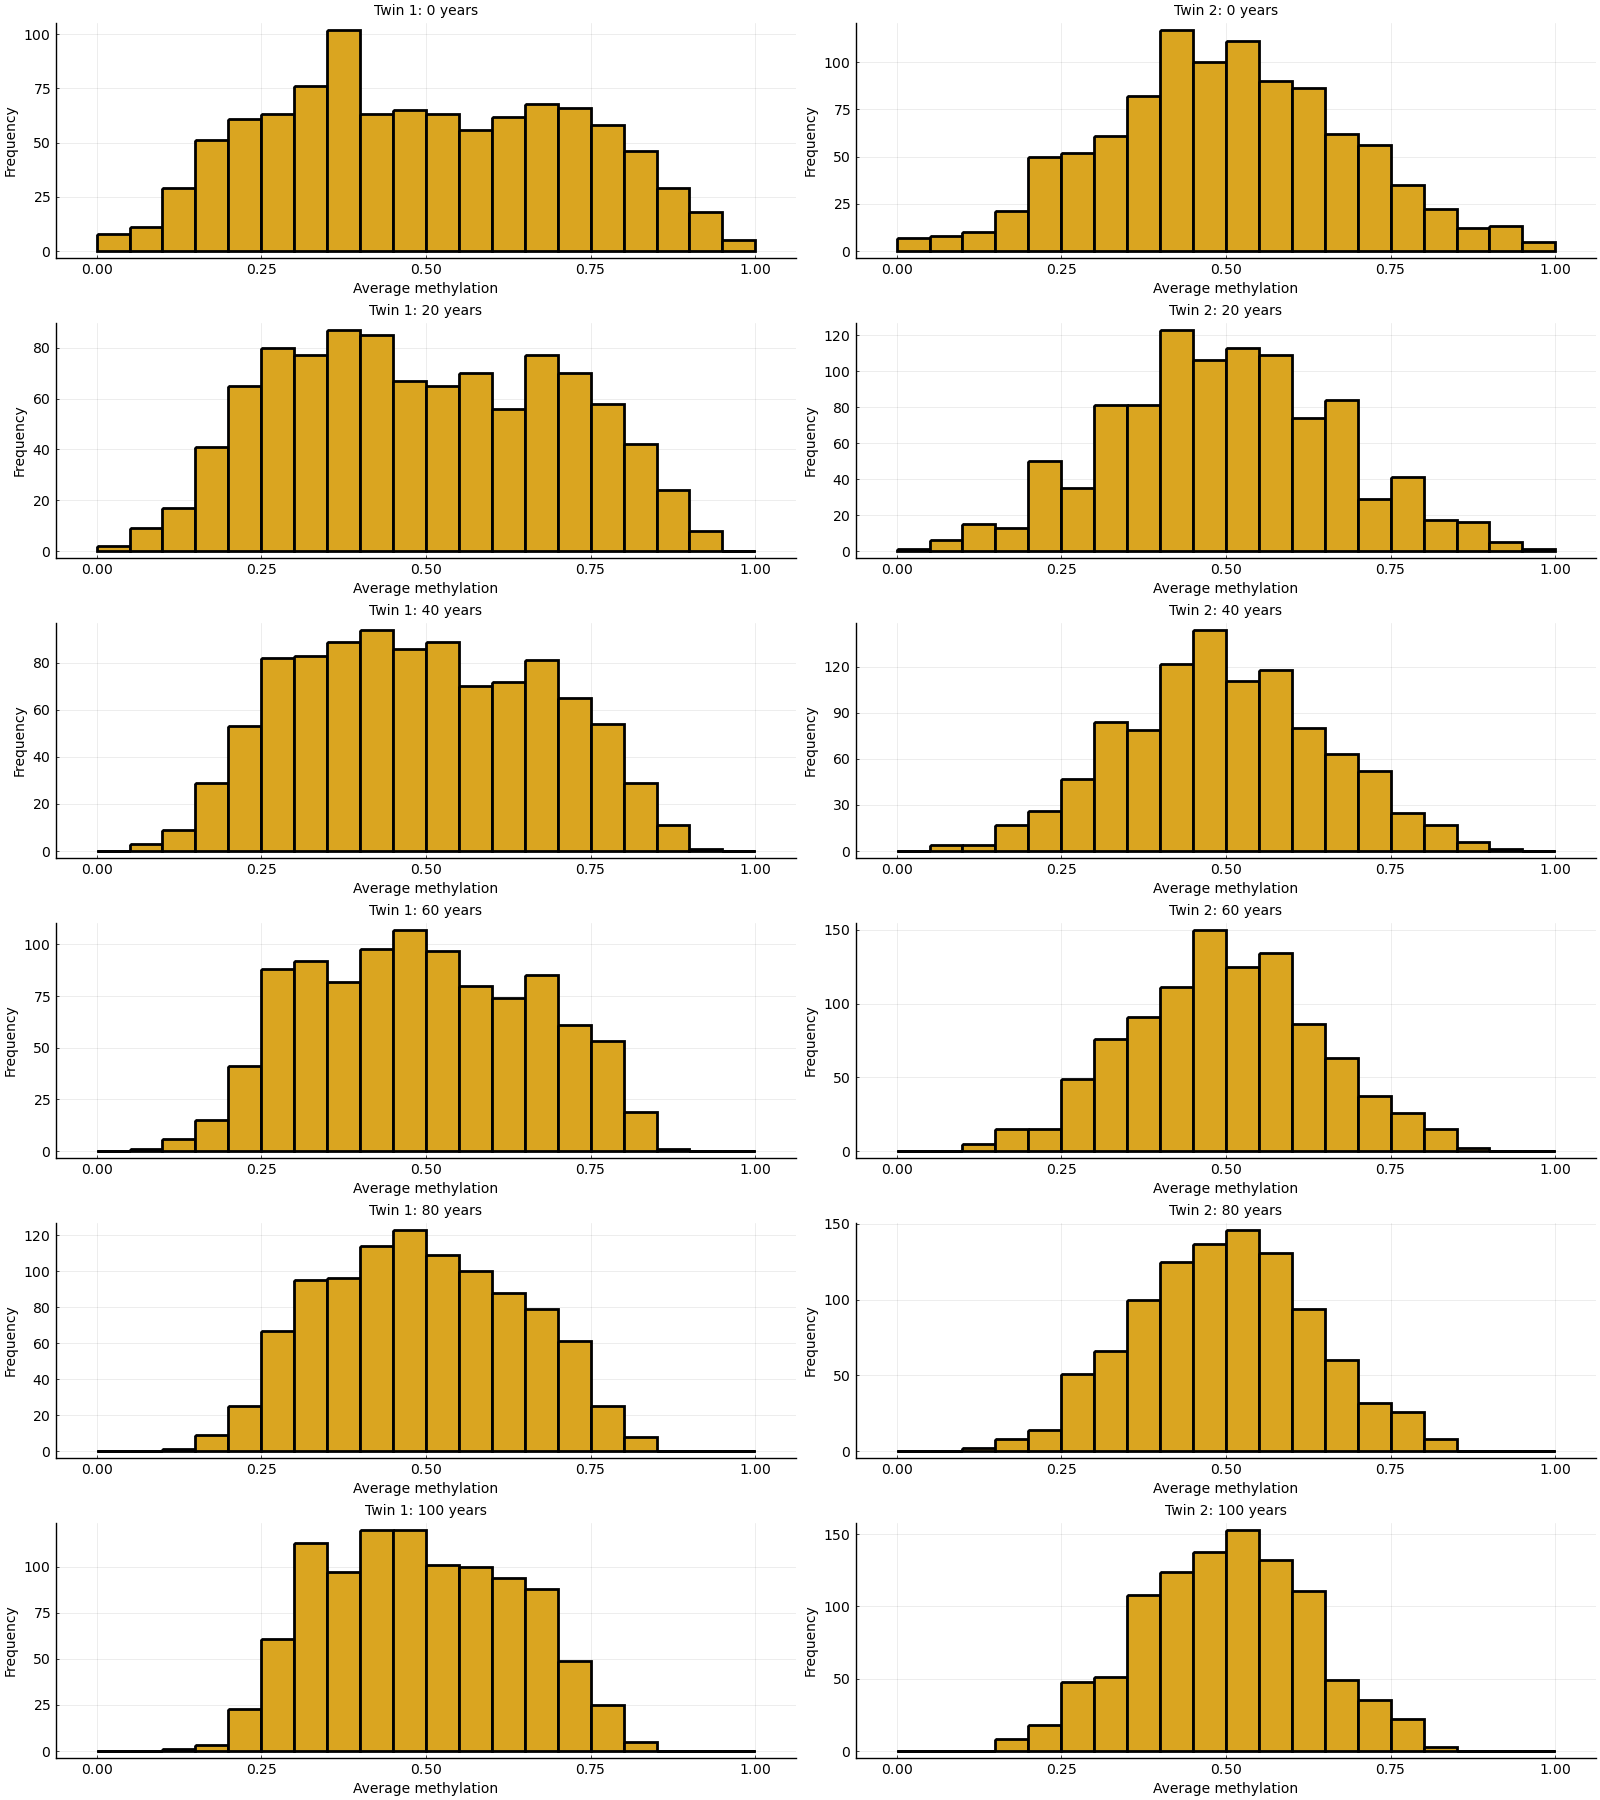

In [110]:
#histograms of average methylation over time
plot()
x1_0 = histogram(ave_cells[:,1,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 1: 0 years", titlefontsize=10)
x2_0 = histogram(ave_cells[:,1,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 2: 0 years", titlefontsize=10)
x1_20 = histogram(ave_cells[:,21,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 1: 20 years", titlefontsize=10)
x2_20 = histogram(ave_cells[:,21,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 2: 20 years", titlefontsize=10)
x1_40 = histogram(ave_cells[:,41,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 1: 40 years", titlefontsize=10)
x2_40 = histogram(ave_cells[:,41,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 2: 40 years", titlefontsize=10)
x1_60 = histogram(ave_cells[:,61,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 1: 60 years", titlefontsize=10)
x2_60 = histogram(ave_cells[:,61,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 2: 60 years", titlefontsize=10)
x1_80 = histogram(ave_cells[:,81,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 1: 80 years", titlefontsize=10)
x2_80 = histogram(ave_cells[:,81,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 2: 80 years", titlefontsize=10)
x1_100 = histogram(ave_cells[:,101,1], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 1: 100 years", titlefontsize=10)
x2_100 = histogram(ave_cells[:,101,2], lw = 2, linestyle = :solid, size =(1600/2,600), palette = palette(["Goldenrod", :"Goldenrod"], 2), bins = 0:0.05:1, font = "Ariel", alpha = 1, legend = false, xtickfontsize=10, ytickfontsize=10, xlabel="Average methylation", xguidefontsize=10, ylabel="Frequency", yguidefontsize=10, title = "Twin 2: 100 years", titlefontsize=10)
plot(x1_0, x2_0, x1_20, x2_20, x1_40, x2_40, x1_60, x2_60, x1_80, x2_80, x1_100, x2_100, layout=grid(6,2), size = (1600,600*3))

In [111]:
#calculate Pearson coefficient over time
pearson_cells = zeros(101)
for i = 1:101
    cor_cells = cor(ave_cells[:,i,:])
    vec_cells = cor_cells[tril!(trues(size(cor_cells)), -1)]
    pearson_cells[i] = vec_cells[1]
end

In [112]:
pearson_cells

101-element Vector{Float64}:
 0.8682100024343292
 0.8566773880774831
 0.8723314140499596
 0.8580967330089525
 0.8585784270377134
 0.8844093459226218
 0.8871729405127554
 0.8948789171214926
 0.8773113825258113
 0.8654158367913122
 0.8608474127785405
 0.8734972010183323
 0.8646797837396749
 ⋮
 0.8179202200241708
 0.8166015771275982
 0.8172311802025607
 0.8007994093224198
 0.8108432413260507
 0.8152273150875361
 0.8087791000293543
 0.8057788375278295
 0.7895270242067735
 0.7703298937893964
 0.786209990192105
 0.7822580663836771

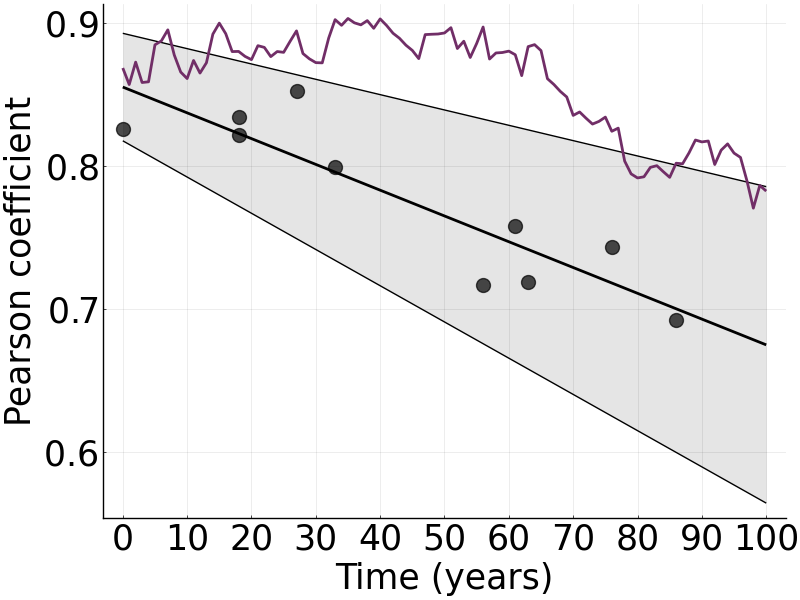

In [113]:
#plot simulation with data (monozygotic twins)
scatter()
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mt[2], interval_p2_mt[2]]), linewidth = 1, color = "Black", alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_mt[1], interval_p2_mt[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_mt[2], interval_p2_mt[2]]), fillalpha = 0.1, color = "Black", label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_mt[1], bf_parms_mt[2]]), linewidth = 2, color = "Black", alpha = 1)
scatter!(365*time_estimated_mt, data_estimated_mt, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["Black", "Black"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
plot!(365*LinRange(0,100,101), pearson_cells, xticks = (365*(0:10:100), string.(0:10:100)), color = [color1 color2 color3 color4 color5], linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

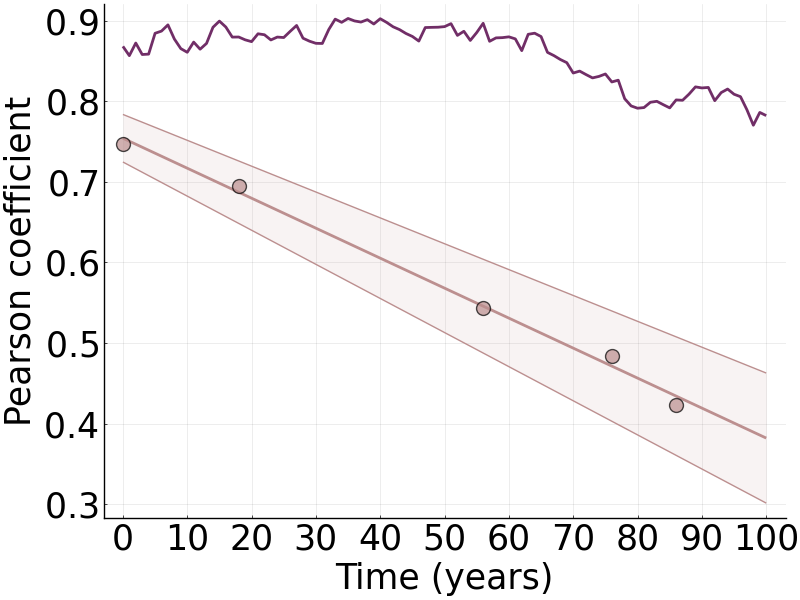

In [114]:
#plot simulation with data (dizygotic twins)
scatter()
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_dt[2], interval_p2_dt[2]]), linewidth = 1, color = "rosybrown", alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_dt[1], interval_p2_dt[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_dt[2], interval_p2_dt[2]]), fillalpha = 0.1, color = "rosybrown", label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_dt[1], bf_parms_dt[2]]), linewidth = 2, color = "rosybrown", alpha = 1)
scatter!(365*time_estimated_dt, data_estimated_dt, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["rosybrown", "rosybrown"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
plot!(365*LinRange(0,100,101), pearson_cells, xticks = (365*(0:10:100), string.(0:10:100)), color = [color1 color2 color3 color4 color5], linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

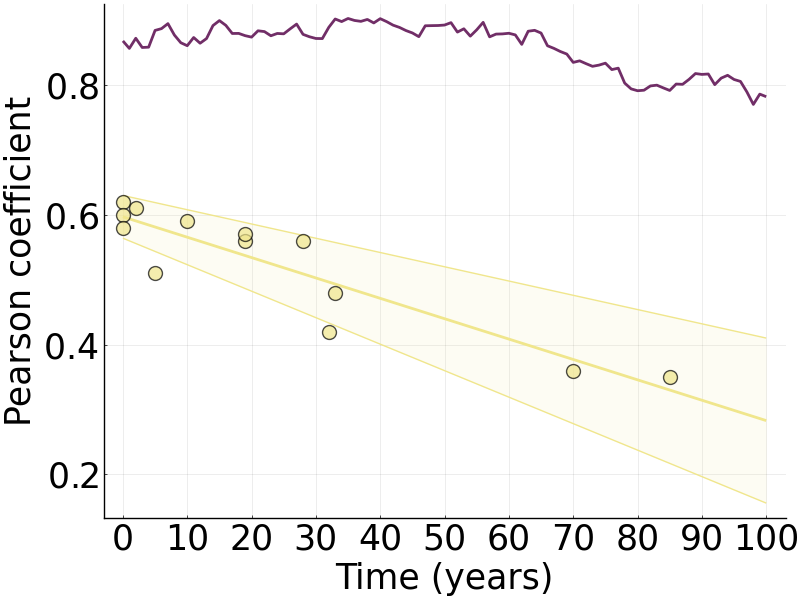

In [115]:
#plot simulation with data (unrelated individuals)
scatter()
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_ur[2], interval_p2_ur[2]]), linewidth = 1, color = "khaki", alpha = 1)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [interval_p1_ur[1], interval_p2_ur[1]]), fillrange = model(LinRange(0.0,100.0,101), [interval_p1_ur[2], interval_p2_ur[2]]), fillalpha = 0.1, color = "khaki", label = "Confidence band", legend = :topleft)
plot!(365*LinRange(0.0,100.0,101), model(LinRange(0.0,100.0,101), [bf_parms_ur[1], bf_parms_ur[2]]), linewidth = 2, color = "khaki", alpha = 1)
scatter!(365*time_estimated_ur, data_estimated_ur, markersize = 10, size =(1600/2,600), font = "Ariel", alpha = 0.7, color_palette = palette(["khaki", "khaki"],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=25)
plot!(365*LinRange(0,100,101), pearson_cells, xticks = (365*(0:10:100), string.(0:10:100)), color = [color1 color2 color3 color4 color5], linewidth = 2, legend = false, size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (years)",xguidefontsize=25,ylabel="Pearson coefficient",yguidefontsize=25,title = "",titlefontsize=20)

In [ ]:
#writedlm("fitness_clones.csv", fitness_clones, ',')

In [ ]:
#writedlm("clone_growth_plot_twin1.csv", clone_growth_plot[:,:,1], ',')

In [ ]:
#writedlm("clone_growth_plot_twin2.csv", clone_growth_plot[:,:,2], ',')

In [ ]:
#writedlm("clone_growth_plot_count_twin1.csv", clone_growth_plot_count[:,:,1], ',')

In [ ]:
#writedlm("clone_growth_plot_count_twin2.csv", clone_growth_plot_count[:,:,2], ',')

In [ ]:
#writedlm("cells_twins_initial_twin1.csv", cells_twins_initial[:,:,1], ',')

In [ ]:
#writedlm("cells_twins_initial_twin2.csv", cells_twins_initial[:,:,2], ',')